# Masinsko ucenje - Projekat 1

Sanja Milenkovic 1549

Dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [332]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from statistics import mean
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

In [222]:
dataset = pd.read_csv('breast-cancer.csv')
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [223]:
dataset.shape

(569, 32)

In [224]:
dataset.drop(columns=['id'], inplace=True)

# 1. Priprema podataka

In [225]:
class_attribute = "diagnosis"
main_column = dataset.diagnosis

In [226]:
dataset.count()

diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64

In [227]:
dataset.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Zakljucak: nema praznih polja u datasetu

In [228]:
duplicates = dataset.duplicated()
print('Broj duplikata: ', duplicates.sum())

Broj duplikata:  0


In [229]:
dataset.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [230]:
dataset[class_attribute] = [0 if name=='B' else 1 for name in dataset.get(class_attribute)]

In [231]:
main_column.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Mapiranje klase: 
0 - Benigno ;
1 - Maligno

In [232]:
dataset.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

<Axes: xlabel='diagnosis'>

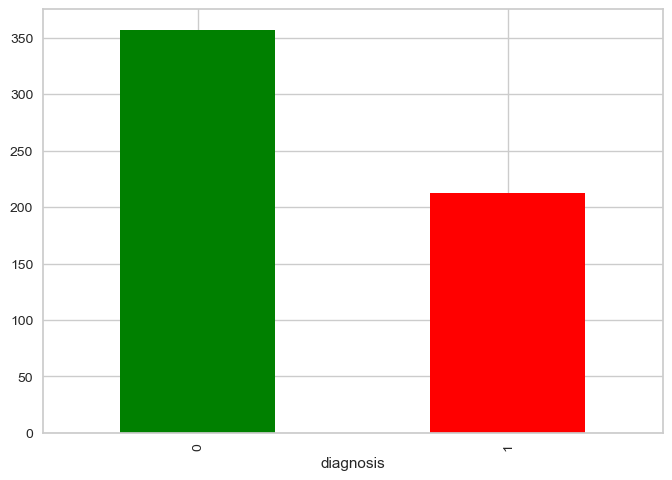

In [233]:
dataset.diagnosis.value_counts().plot(kind="bar", color=['green', 'red'])

# 2. Deskriptivna analiza

In [234]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [235]:
print(dataset.median()) #srednja vrednost, kada su atributi srotirani

diagnosis                    0.000000
radius_mean                 13.370000
texture_mean                18.840000
perimeter_mean              86.240000
area_mean                  551.100000
smoothness_mean              0.095870
compactness_mean             0.092630
concavity_mean               0.061540
concave points_mean          0.033500
symmetry_mean                0.179200
fractal_dimension_mean       0.061540
radius_se                    0.324200
texture_se                   1.108000
perimeter_se                 2.287000
area_se                     24.530000
smoothness_se                0.006380
compactness_se               0.020450
concavity_se                 0.025890
concave points_se            0.010930
symmetry_se                  0.018730
fractal_dimension_se         0.003187
radius_worst                14.970000
texture_worst               25.410000
perimeter_worst             97.660000
area_worst                 686.500000
smoothness_worst             0.131300
compactness_

In [236]:
print(dataset.skew())

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

In [237]:
dataset.describe(include='all',).transpose()

count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

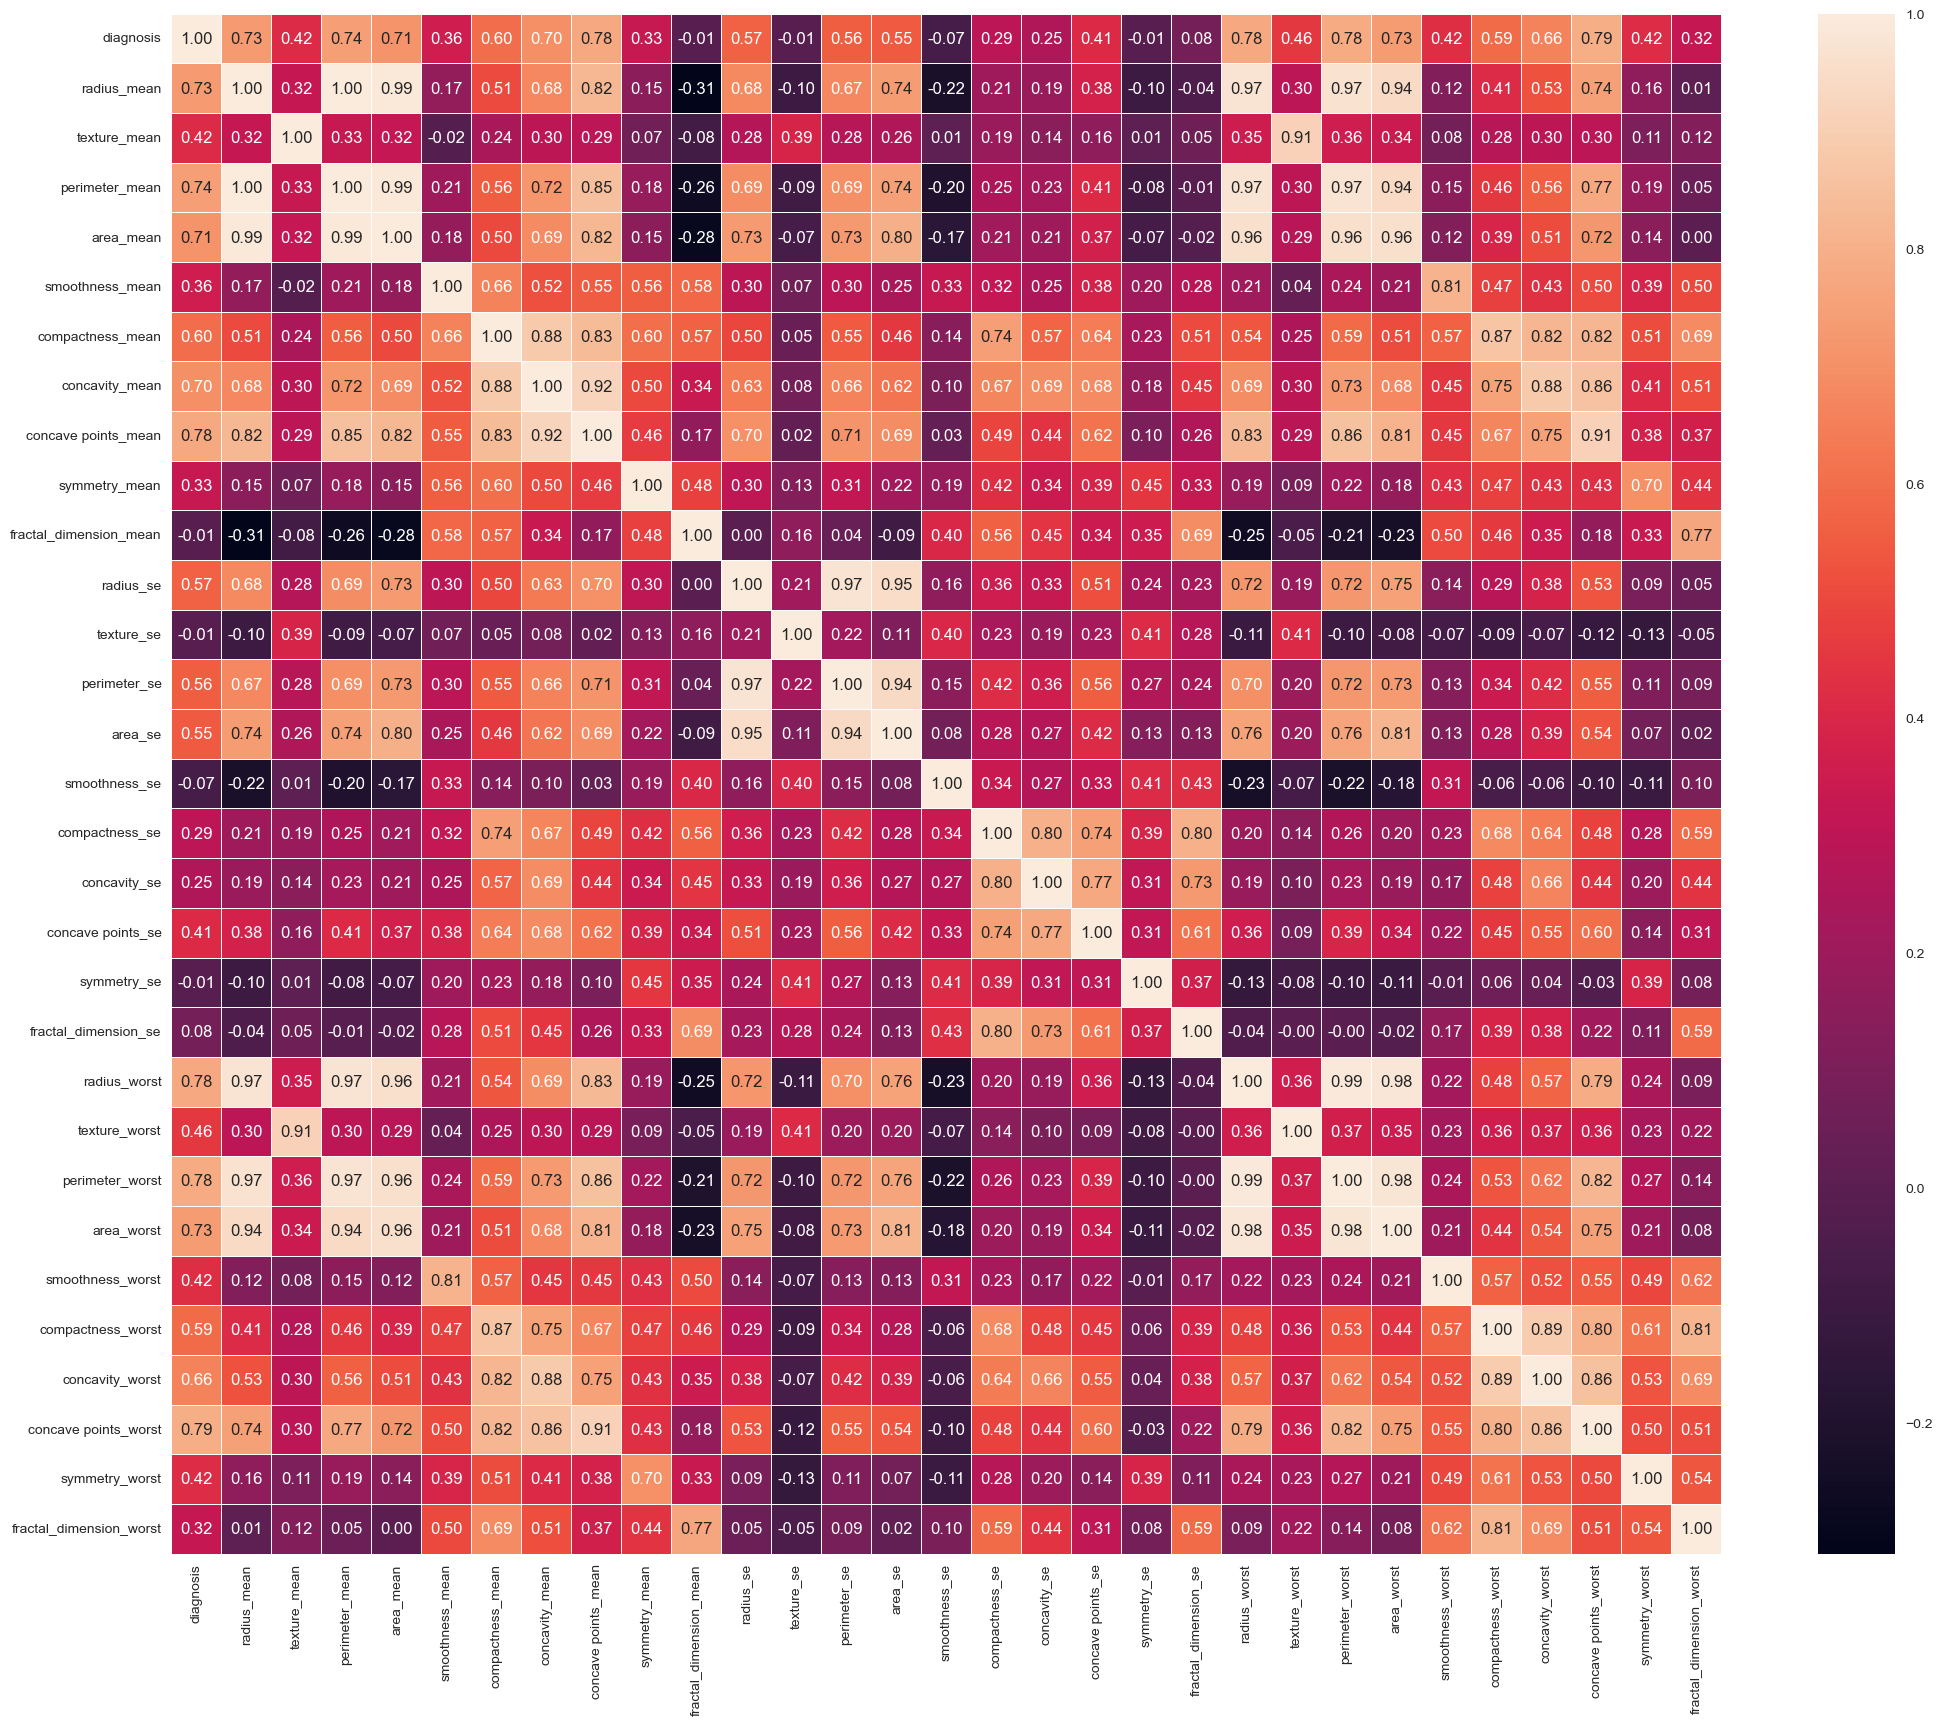

In [238]:
corr_matrix = dataset.corr()
fix, ax = plt.subplots(figsize=(25,20))
ax = sn.heatmap(corr_matrix,
                 annot = True,
                 linewidth=0.5,
                 fmt=".2f")

In [239]:
correlation_matrix = dataset.corr()

# Set your correlation threshold
threshold = 0.8

# Identify highly correlated features
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Drop highly correlated features
dataset_no_correlation = dataset.drop(columns=highly_correlated_features)

print(dataset_no_correlation.shape)

dataset = dataset_no_correlation

(569, 14)


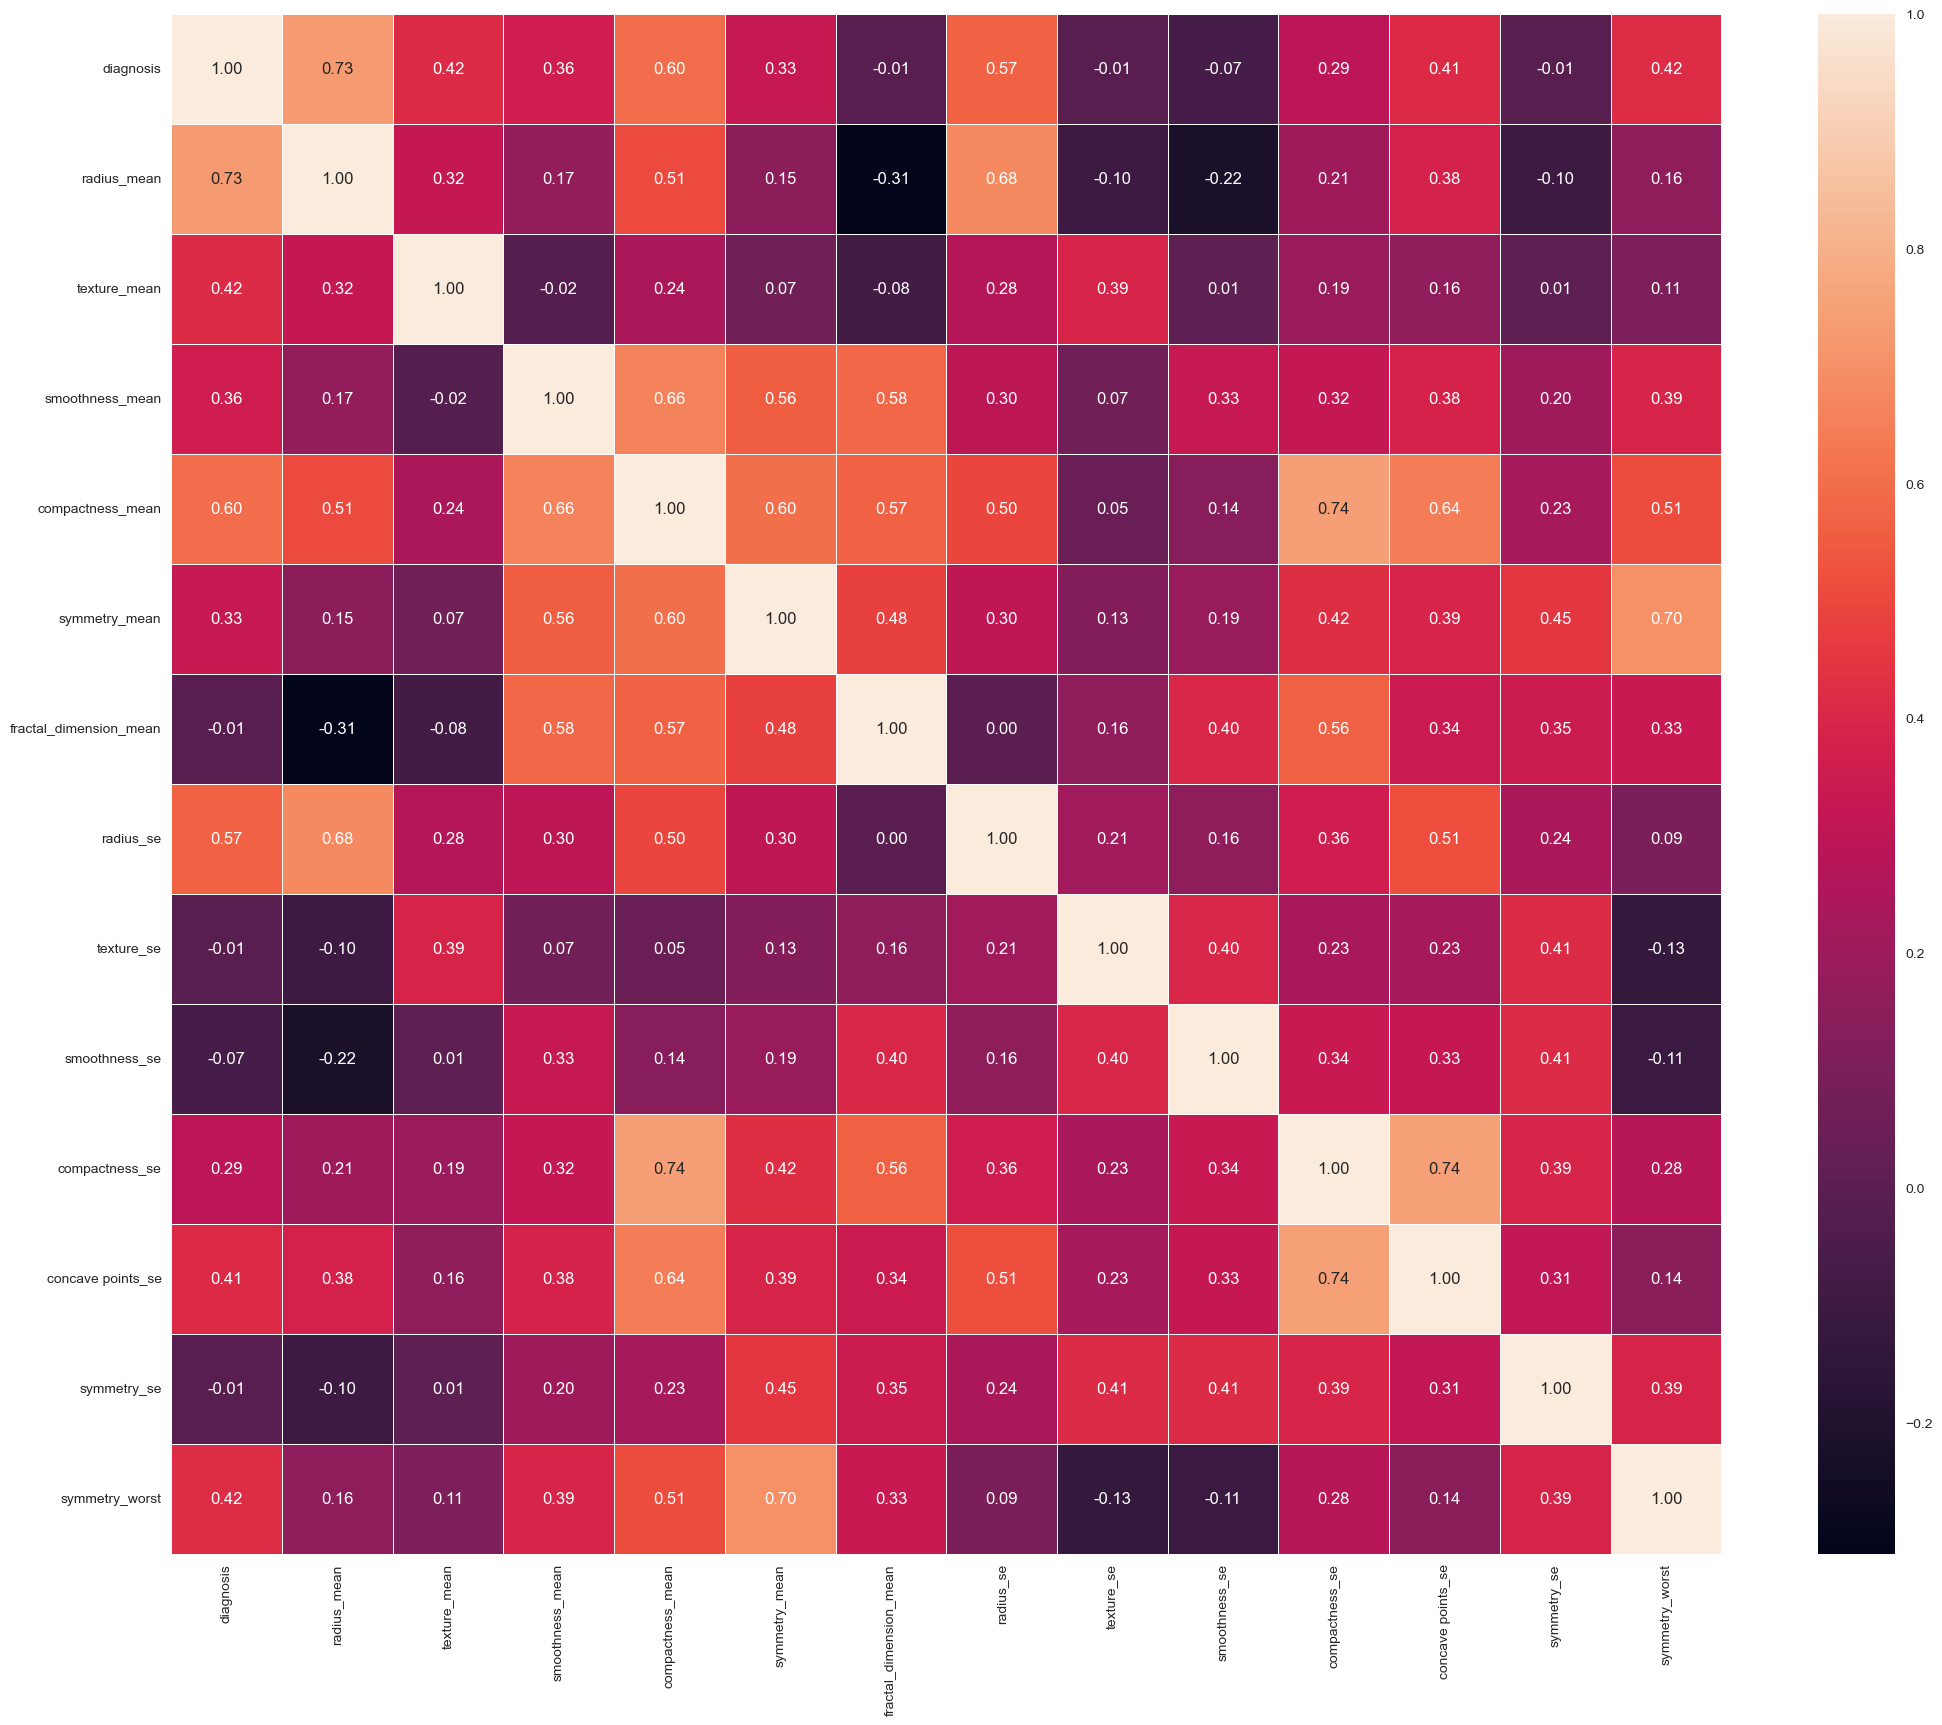

In [240]:
corr_matrix = dataset.corr()
fix, ax = plt.subplots(figsize=(25,20))
ax = sn.heatmap(corr_matrix,
                 annot = True,
                 linewidth=0.5,
                 fmt=".2f")

In [241]:
def show_numerical_distribution(dataset): 
    num_cols = len(dataset.columns[:-1])
    num_rows = num_cols // 2 + (num_cols % 2)

    fig, axs = plt.subplots(num_rows, 2, figsize=(20, 20), constrained_layout=True)

    for i, f in enumerate(dataset.columns[:-1]):
        row = i // 2
        col = i % 2
        sn.histplot(x=f, data=dataset, hue='diagnosis', multiple='stack', kde=True,
                    ax=axs[row][col], bins=20,
                    palette=sn.color_palette("viridis", 2))

    if num_cols % 2 != 0:
        sn.histplot(x=dataset.columns[-1], data=dataset, hue='diagnosis', multiple='stack', kde=True,
                    ax=axs[num_rows - 1][1], bins=20,
                    palette=sn.color_palette("viridis", 2))

    plt.show()

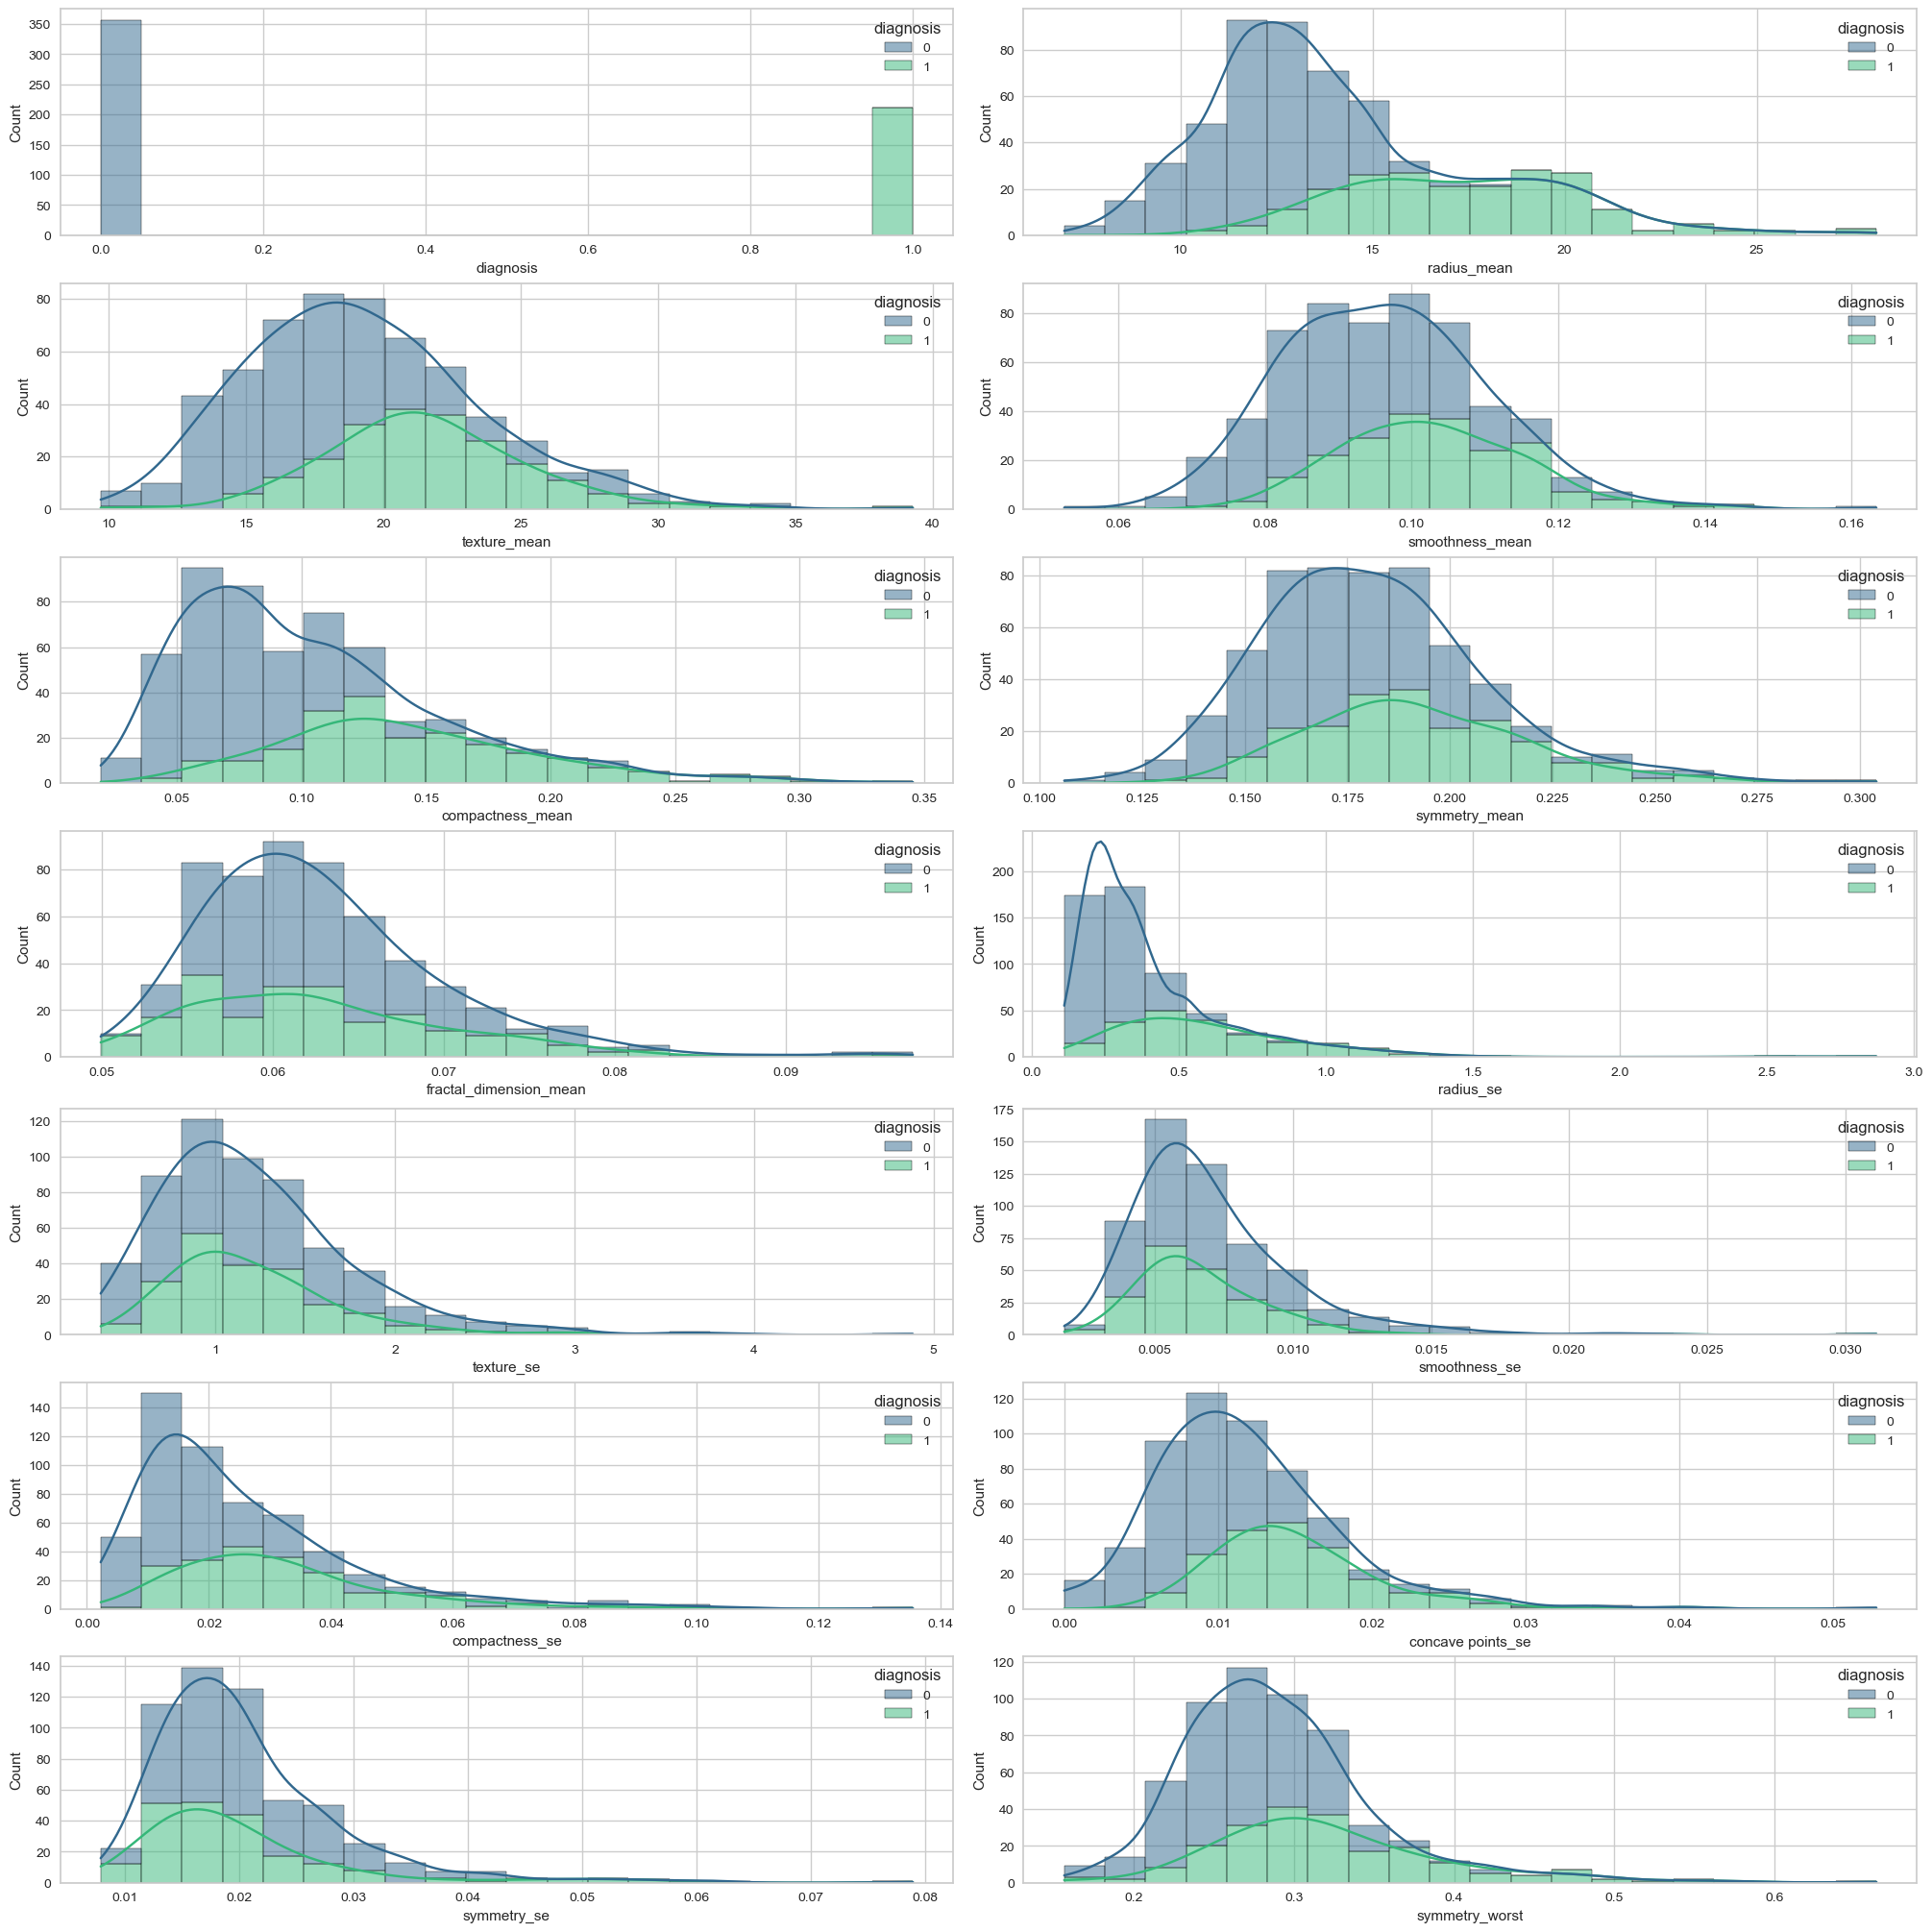

In [242]:
show_numerical_distribution(dataset)

In [243]:
def show_outliers(dataset) :
    plt.figure(figsize=(15, 10))

    num_cols = len(dataset.columns[:-1])
    num_rows = (num_cols + 3) // 4  # Calculate number of rows dynamically

    for i, column in enumerate(dataset.columns[:-1]):
        plt.subplot(num_rows, min(4, num_cols), i+1)  # Adjusting the number of columns per row
        sn.boxplot(x=dataset["diagnosis"], y=dataset[column], palette=("yellow", "green"))
        plt.tight_layout()

    plt.show()

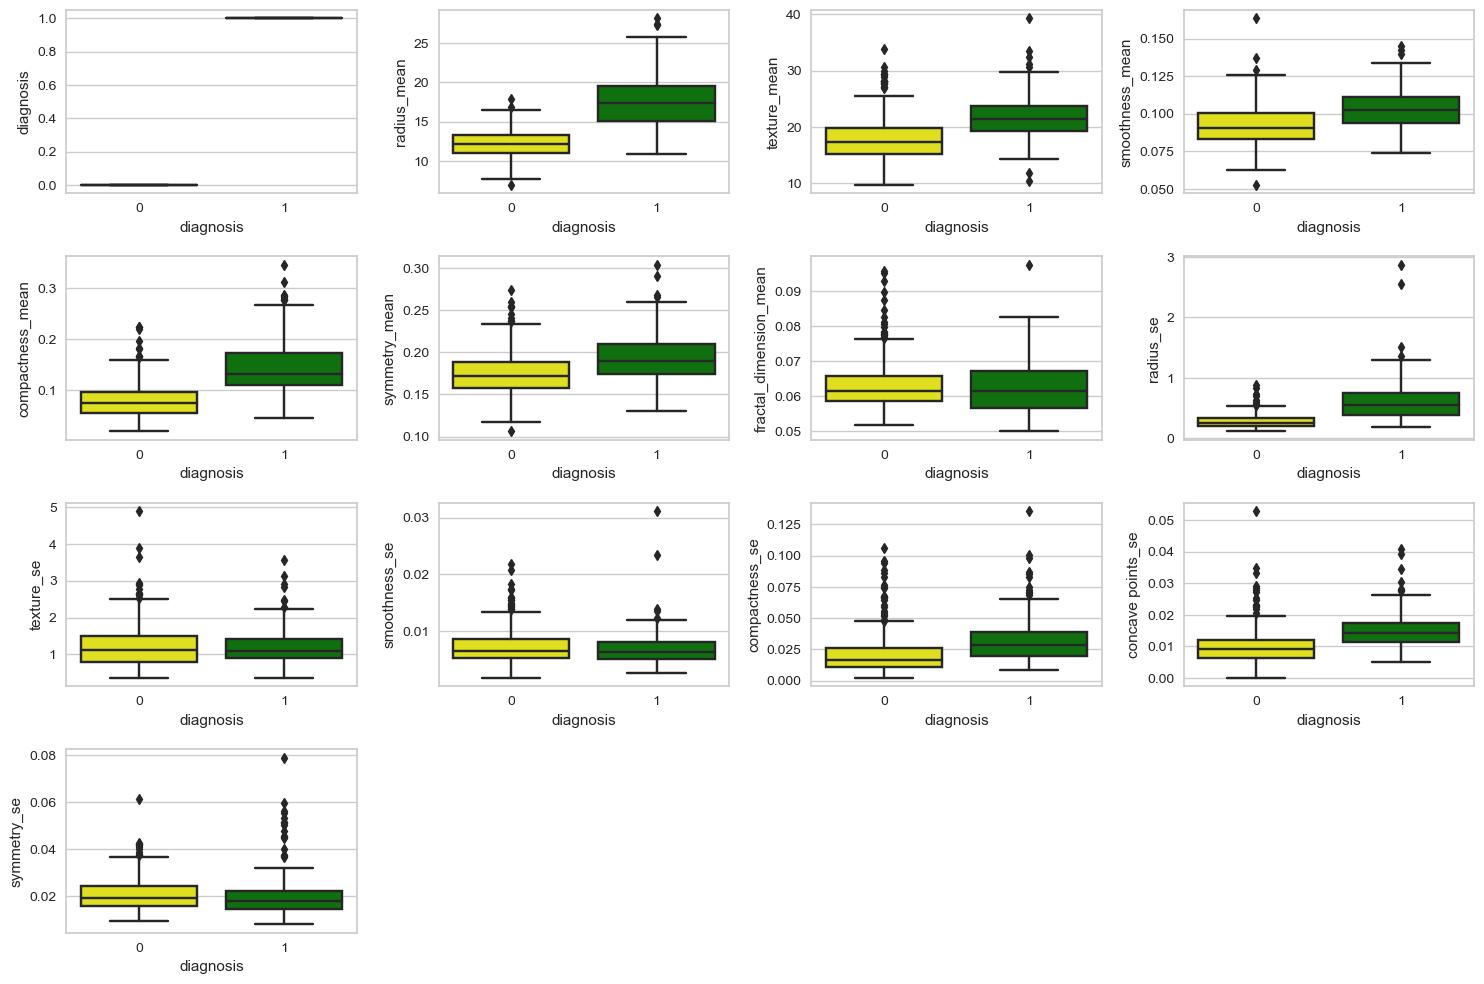

In [244]:
show_outliers(dataset)

Svaki od atributa ima outliere.

Izbacivanje outlier-a bice pokusano IQR metodom i standardnom devijacijom.

In [245]:
def remove_outliers(dataset, column_names, th1=0.25, th3=0.75):
    dataset_no_outliers = dataset.copy()  # Make a copy of the dataset to avoid modifying the original

    for column_name in column_names:
        # Extract the specified feature
        feature = dataset_no_outliers[column_name]

        q11 = feature.quantile(th1)
        q33 = feature.quantile(th3)

        # Calculate quartiles and IQR
        iqr = q33 - q11
        lower_bound = q11 - (iqr * 1.5)
        upper_bound = q33 + (iqr * 1.5)

        # Identify outliers
        boolean_outliers = (feature > upper_bound) | (feature < lower_bound)

        # Remove outliers from the dataset
        dataset_no_outliers = dataset_no_outliers[~boolean_outliers]

    return dataset_no_outliers

In [246]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 2 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 2 * dataframe[col_name].std()
    return lower_boundary, upper_boundary

def remove_ouliers_standard_deviation (dataset, column_names) :
    no_copy = dataset.copy()

    for column in column_names :
        lb, ub = determine_outlier_thresholds_std(dataset, column)
        outliers = (dataset[column] > ub) | (dataset[column] < lb)
        no_copy = no_copy[~outliers]

    return no_copy

In [247]:
#nakon IQR metode
dataset_without_outliers = remove_outliers(dataset, dataset.columns)

print("Dataset: ", dataset.shape)
print("Dataset without outliers: ", dataset_without_outliers.shape)

Dataset:  (569, 14)
Dataset without outliers:  (390, 14)


In [248]:
dataset_without_outliers_sd = remove_ouliers_standard_deviation(dataset, dataset.columns)

print("Dataset: ", dataset.shape)
print("Dataset without outliers with standard deviation: ", dataset_without_outliers_sd.shape)

Dataset:  (569, 14)
Dataset without outliers with standard deviation:  (414, 14)


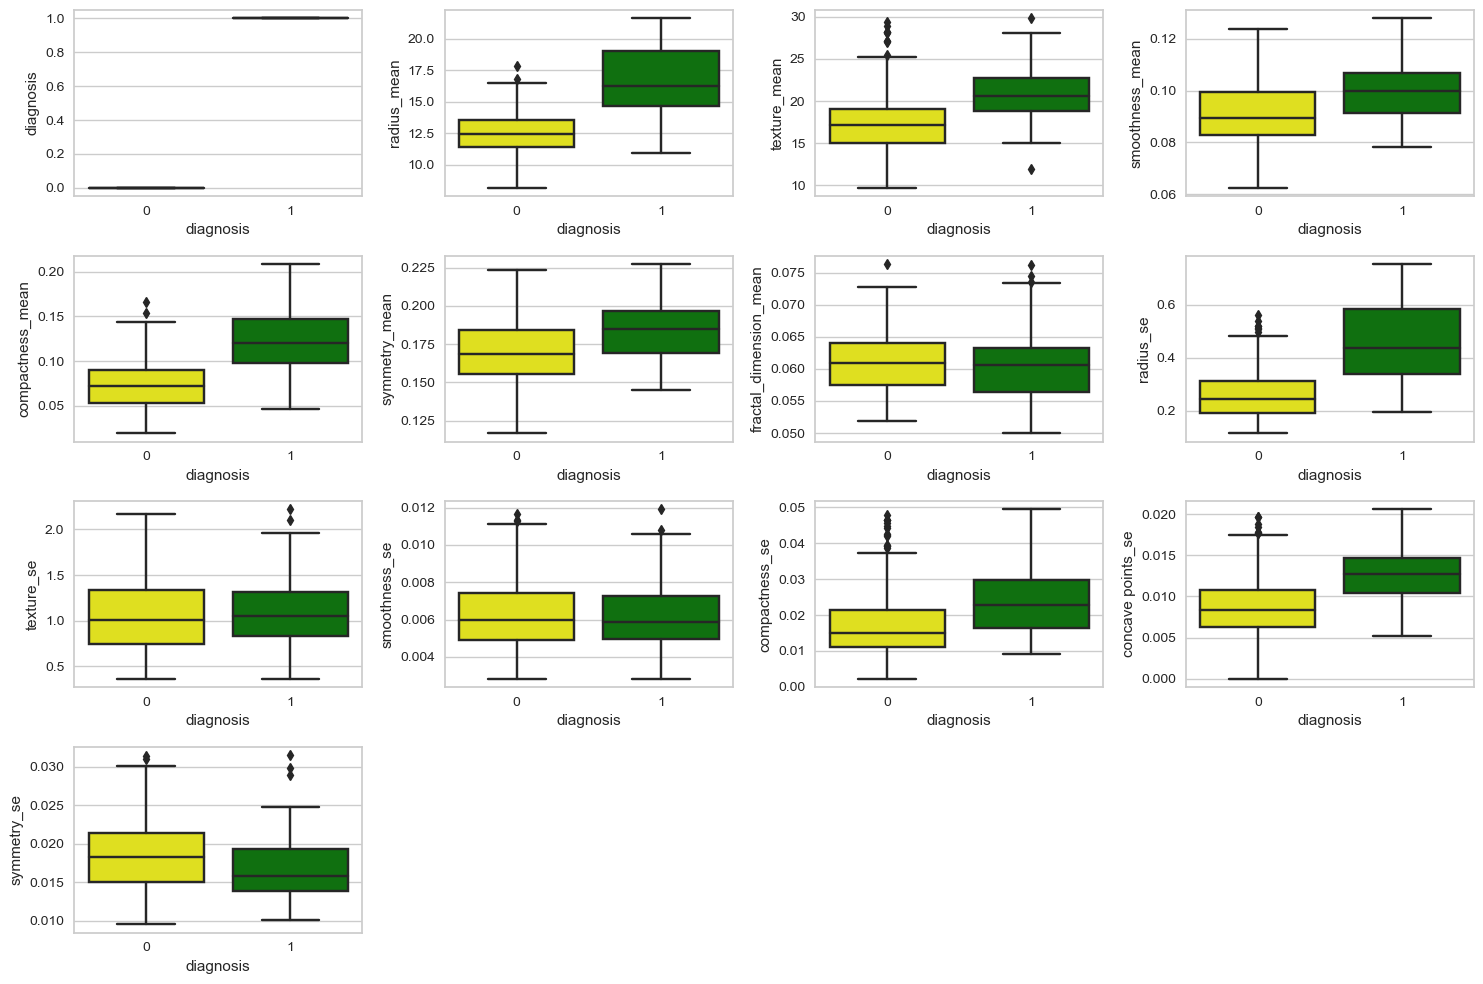

In [249]:
show_outliers(dataset_without_outliers)

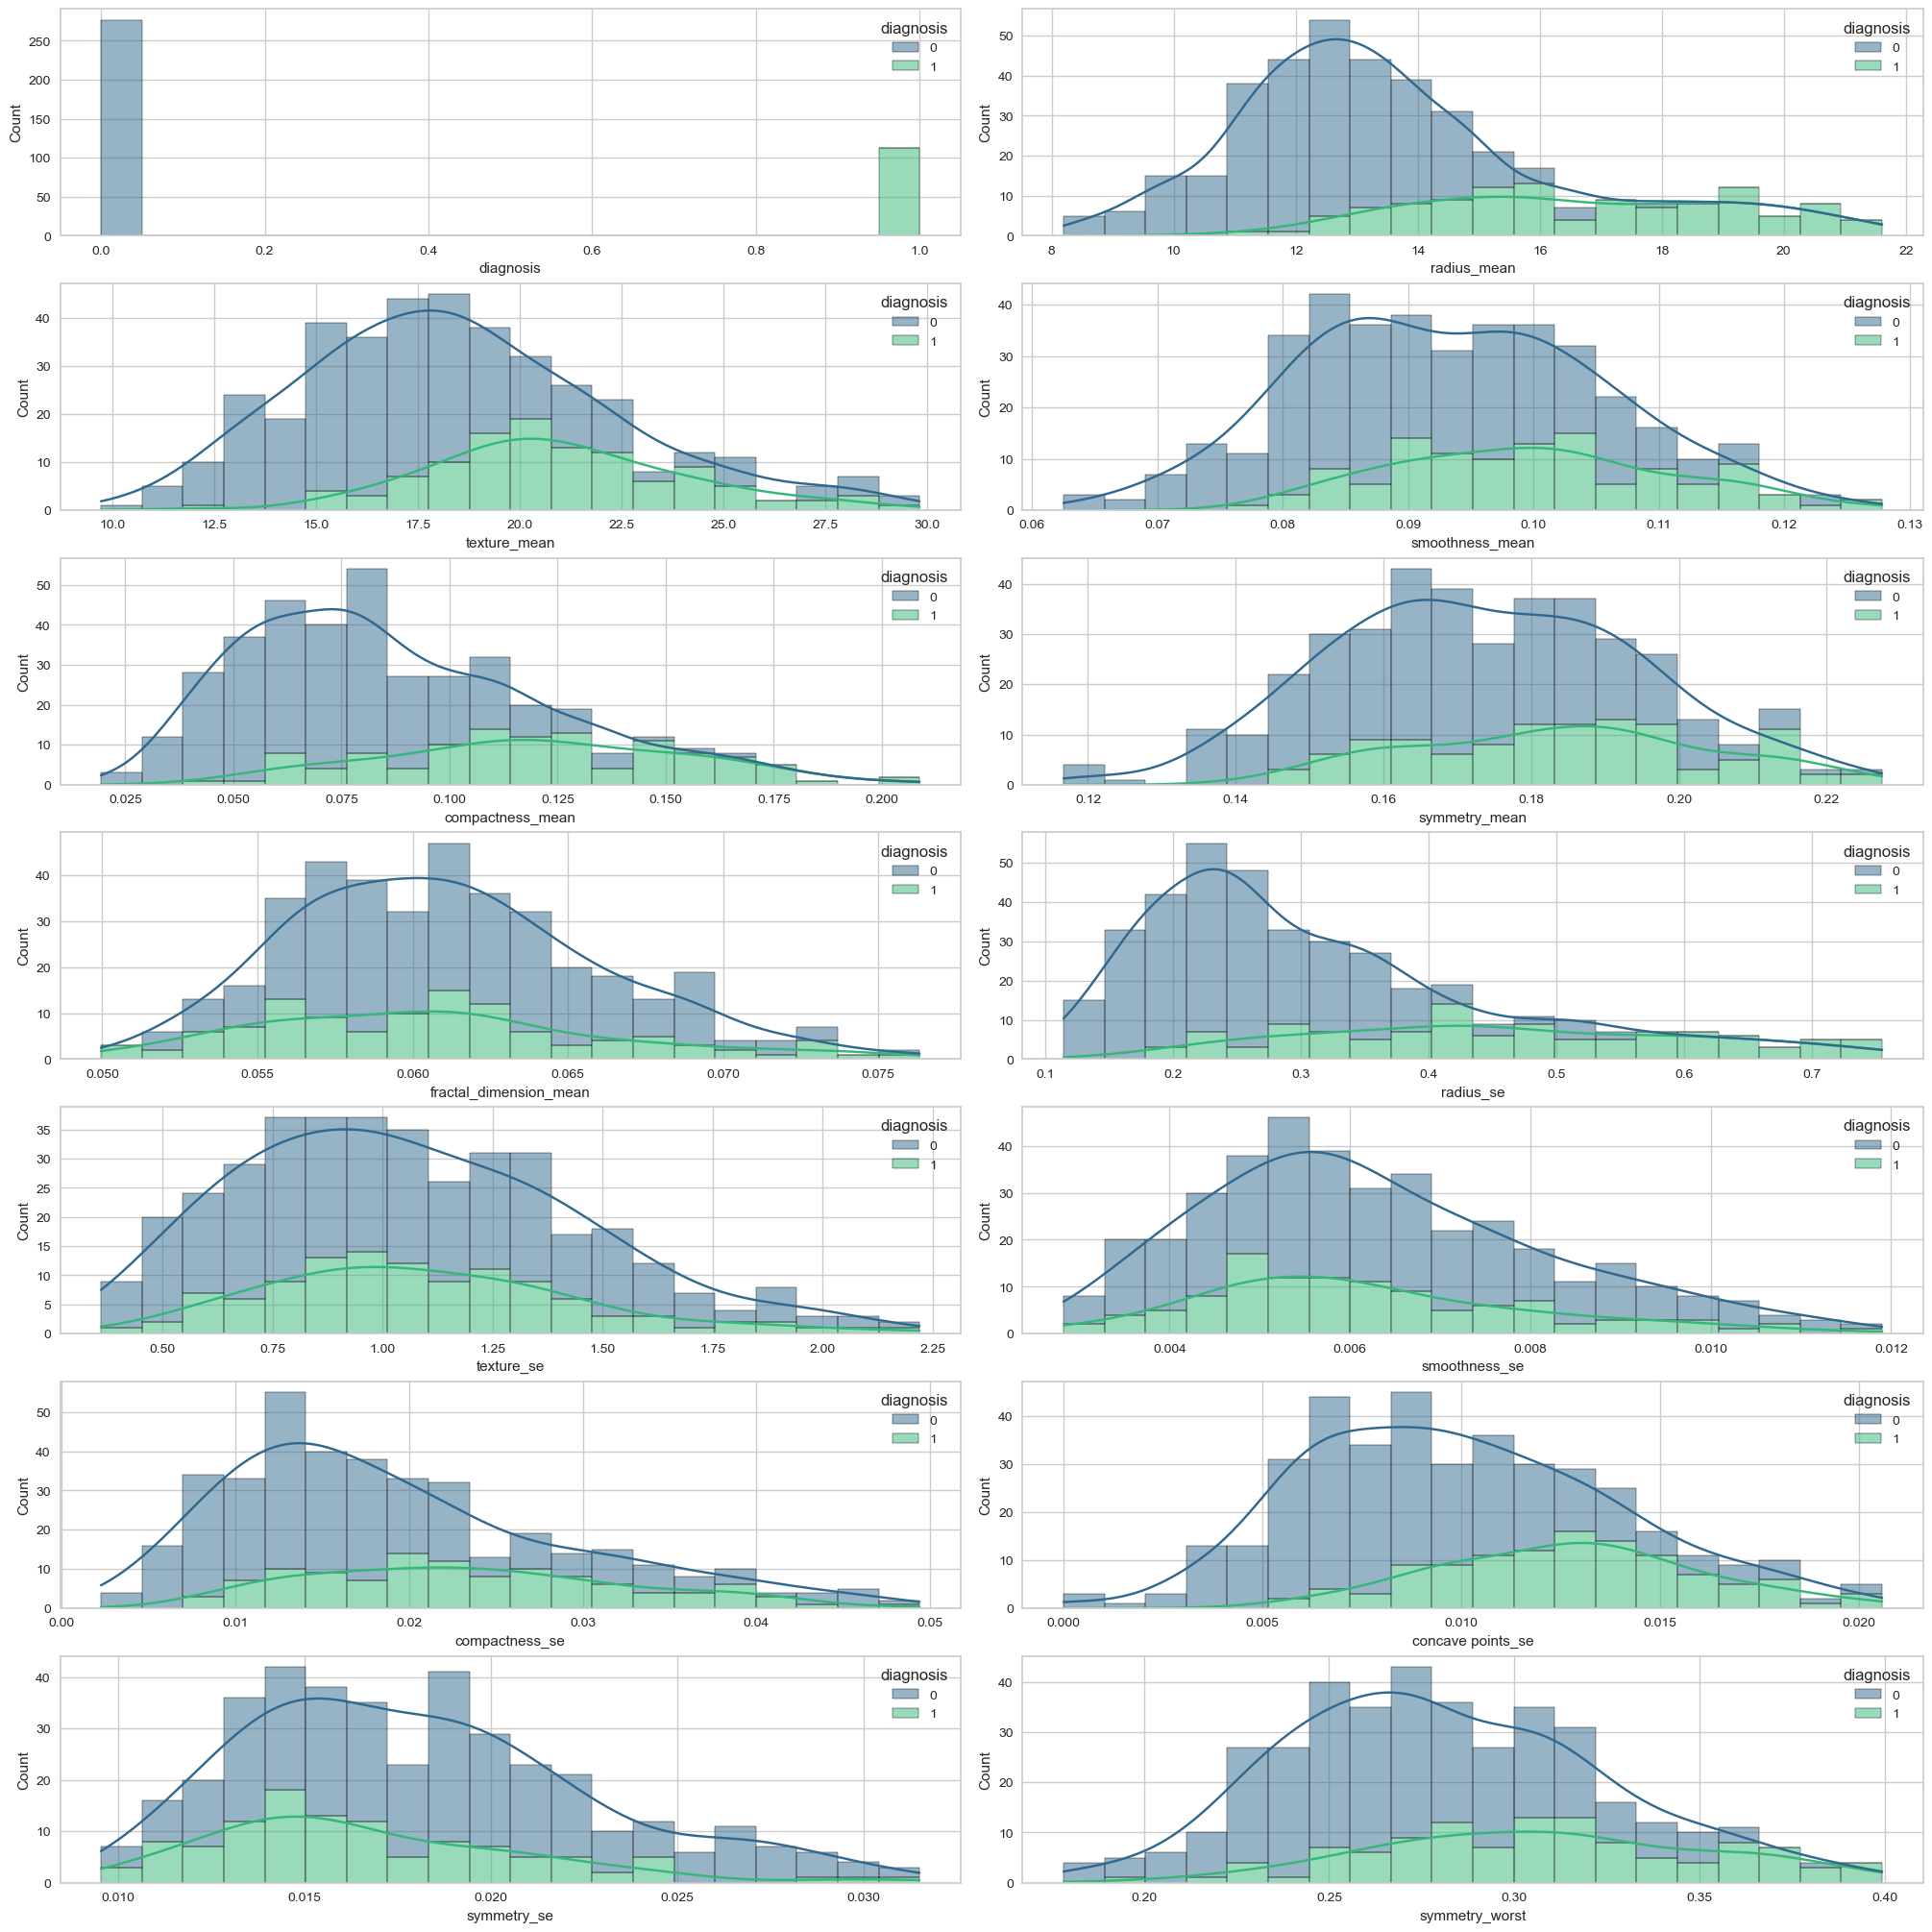

In [250]:
show_numerical_distribution(dataset_without_outliers)

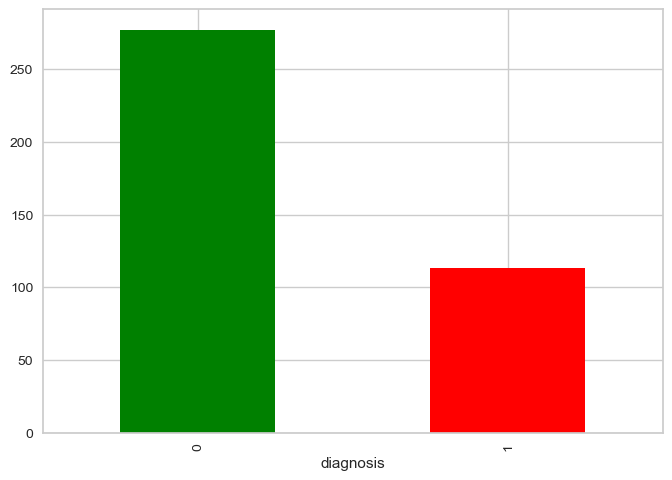

In [251]:
dataset_without_outliers.diagnosis.value_counts().plot(kind="bar", color=['green', 'red'])
plt.show()

# TEST AND TRAIN DATA

In [255]:
class_names = ['B', 'M']

In [279]:
from sklearn.model_selection import cross_val_score, train_test_split

def split_test_and_train_data (dataset) : 

    x = dataset.drop(class_attribute, axis=1).values
    y = dataset[class_attribute].values

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

    return x_train, x_test, y_train, y_test

In [277]:
x_train, x_test, y_train, y_test = split_test_and_train_data(dataset_without_outliers)

In [282]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [350]:
positive_count, negative_count = dataset_without_outliers['diagnosis'].value_counts()

0:  277
1:  277


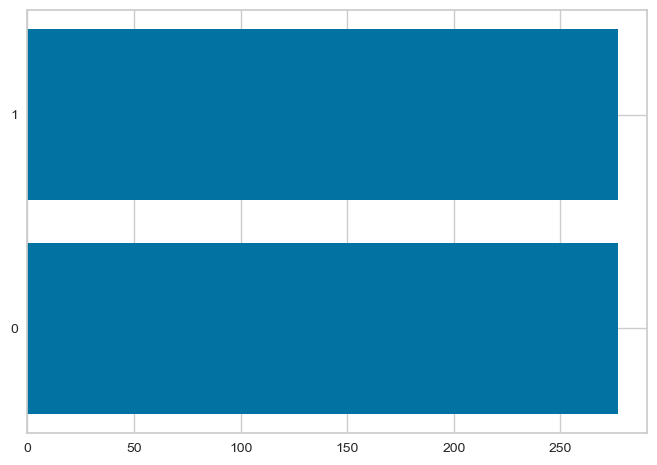

In [354]:
from sklearn.utils import resample

minority_class = dataset_without_outliers[dataset_without_outliers[class_attribute] == 1]
majority_class  = dataset_without_outliers[dataset_without_outliers[class_attribute] == 0]

minor_upsampled = resample(minority_class, replace=True, n_samples=positive_count, random_state=42)
dataset_upsampled = pd.concat([majority_class, minor_upsampled])
type_0, type_1 = dataset_upsampled[class_attribute].value_counts()

plt.barh(["0","1"], [type_0, type_1])
print("0:  "+ str(type_0))
print("1:  "+ str(type_1))

In [355]:
x_train_up, x_test_up, y_train_up, y_test_up = split_test_and_train_data(dataset_upsampled)

In [357]:
scaler = StandardScaler()
x_train_scaled_up = scaler.fit_transform(x_train_up)
x_test_scaled_up = scaler.fit_transform(x_test_up)

Negative:  113
Positive:  113


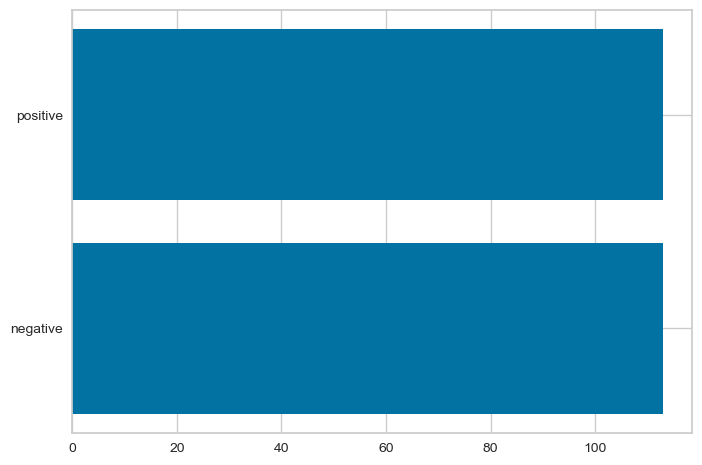

In [378]:
major_undersampled = resample(majority_class, replace = False, n_samples = negative_count, random_state = 0)
dataset_undersampled = pd.concat([major_undersampled, minority_class])

undersampled_positive_count, undersampled_negative_count = dataset_undersampled[class_attribute].value_counts()

plt.barh(["negative","positive"], [undersampled_negative_count, undersampled_positive_count])
print("Negative:  "+ str(undersampled_negative_count))
print("Positive:  "+ str(undersampled_positive_count))

In [379]:
x_train_under, x_test_under, y_train_under, y_test_under = split_test_and_train_data(dataset_undersampled)

In [380]:
scaler = StandardScaler()
x_train_scaled_under = scaler.fit_transform(x_train_under)
x_test_scaled_under = scaler.fit_transform(x_test_under)

In [259]:
# Matrice konfuzije
def matrix_confusion(matrix):
    # Create pandas dataframe
    dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

    # Create heatmap
    sn.heatmap(dataframe, annot=True, cbar=None)

    plt.title("Confusion Matrix")
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")

    plt.show()    

In [305]:
from yellowbrick.classifier import ClassificationReport

def visualize_results(model, x_train, y_train, x_test, y_test) :
    
    visualizer = ClassificationReport(model, classes=class_names)

    visualizer.fit(x_train, y_train) 
    visualizer.score(x_test, y_test)
    visualizer.show()

In [267]:
from sklearn.metrics import roc_curve, auc

# Plot AUC-ROC Curve
def auc_roc_plot(test, prediction):
    fpr, tpr, threshold = roc_curve(test, prediction)
    roc_auc = auc(fpr, tpr)

    plt.title('AUC-ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Naive Bayes

In [317]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

def Naive_Bayes_train_and_predict(x_train, y_train, x_test, y_test) :
 
    #create an object of the type GaussianNB
    gnb = GaussianNB()
    #train the algorithm on training data and predict using the testing data
    pred = gnb.fit(x_train, y_train).predict(x_test)
    #print the accuracy score of the model
    print("Naive-Bayes accuracy: ", accuracy_score(y_test, pred, normalize = True))

    visualize_results(gnb, x_train, y_train, x_test, y_test)

    # Create confusion matrix
    matrix_confusion(confusion_matrix(y_test, pred))

    auc_roc_plot(y_test, pred)

    return gnb
    

Naive-Bayes accuracy:  0.9102564102564102


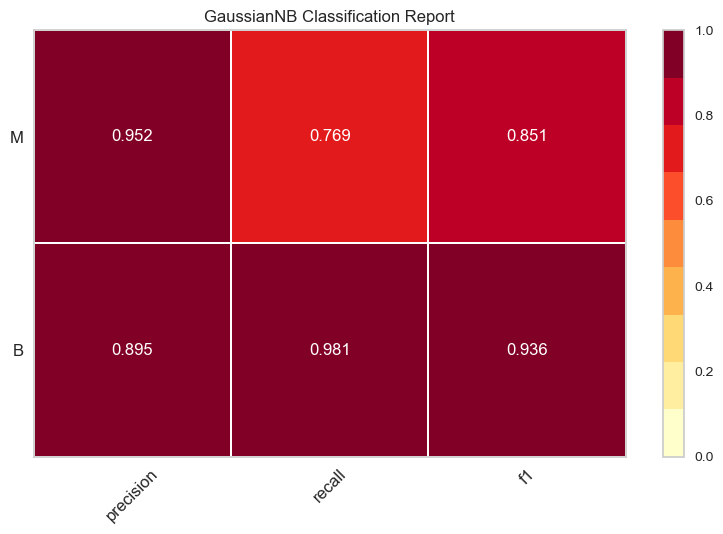

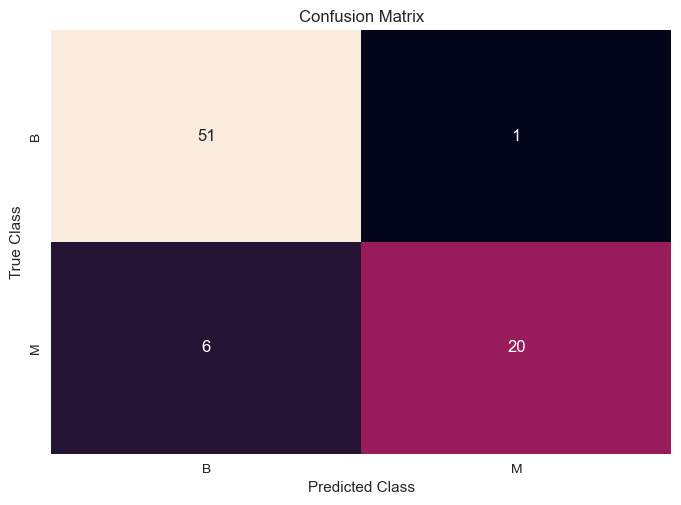

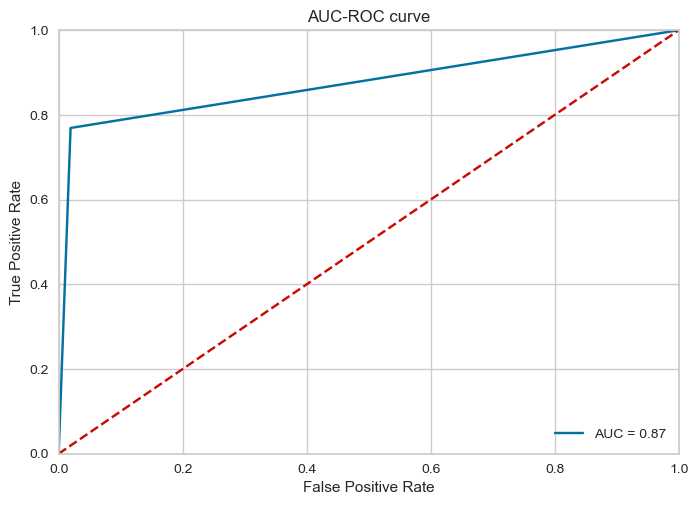

In [318]:
gnb_classifier = Naive_Bayes_train_and_predict(x_train_scaled, y_train, x_test_scaled, y_test)

Naive-Bayes accuracy:  0.8738738738738738


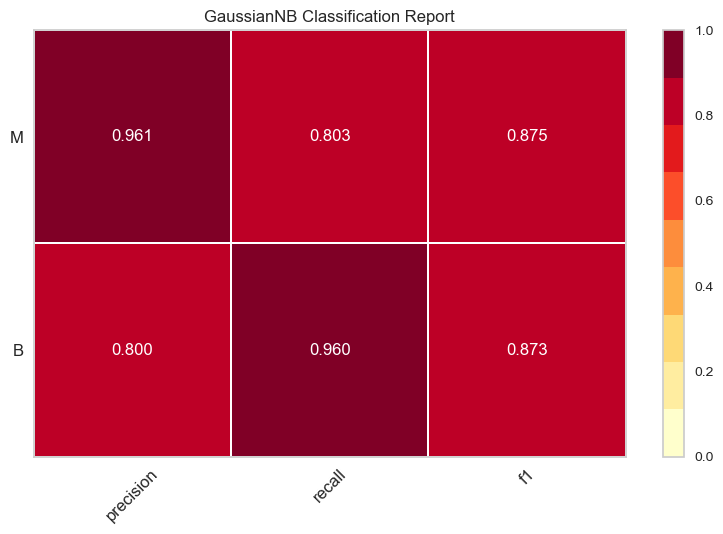

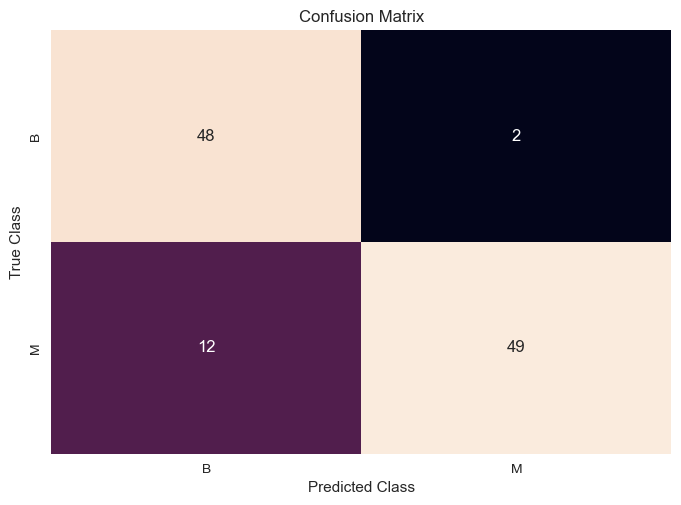

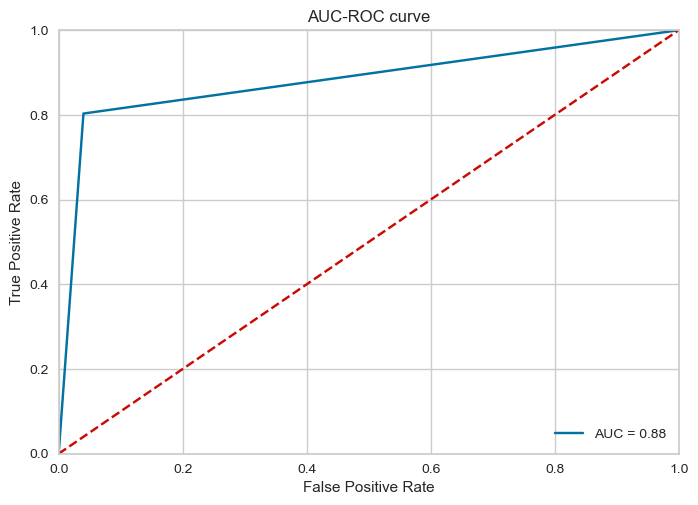

GaussianNB()

In [358]:
Naive_Bayes_train_and_predict(x_train_scaled_up, y_train_up, x_test_scaled_up, y_test_up)

Naive-Bayes accuracy:  0.8695652173913043


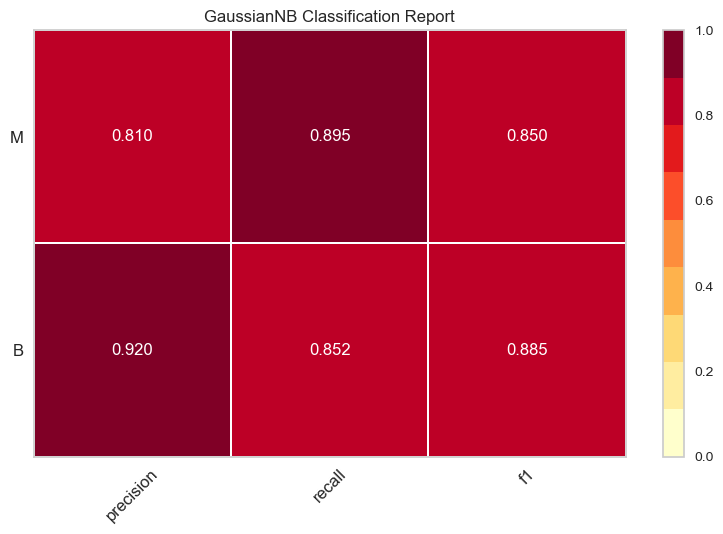

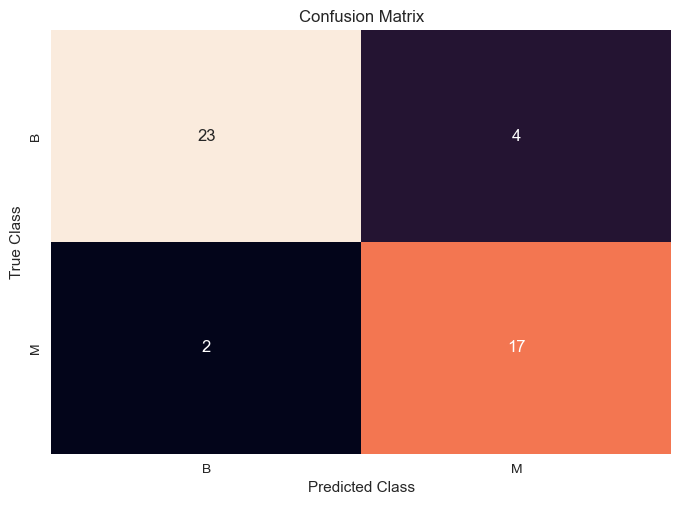

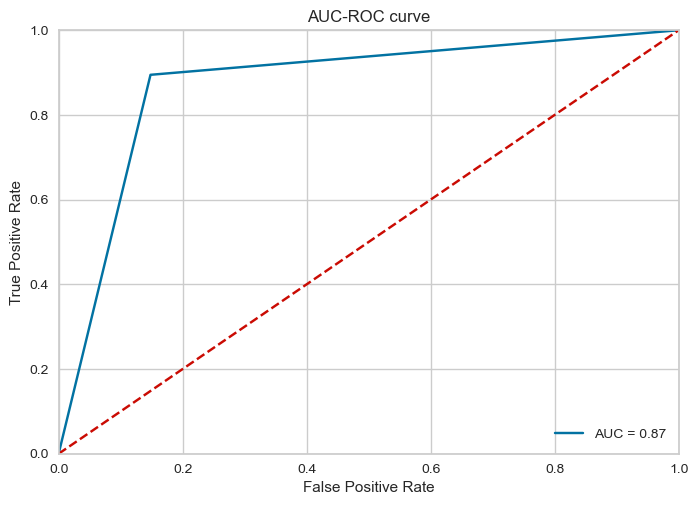

GaussianNB()

In [386]:
Naive_Bayes_train_and_predict(x_train_scaled_under, y_train_under, x_test_scaled_under, y_test_under)

# Linear SVC

In [333]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def LinearSVC_train_and_test(x_train, y_train, x_test, y_test):
    #svc_model = LinearSVC(random_state=0)
    svc_model = LinearSVC(random_state=42, dual=False, C=1.0)
    # to do: ovo razradi da se poigras sa hiperparametrima

    #train the algorithm on training data and predict using the testing data
    pred = svc_model.fit(x_train, y_train).predict(x_test)

    #print the accuracy score of the model
    print("LinearSVC accuracy : ",accuracy_score(y_test, pred, normalize = True))

    visualize_results(svc_model, x_train, y_train, x_test, y_test)

    # Create confusion matrix
    matrix = confusion_matrix(y_test, pred)
    matrix_confusion(matrix)

    auc_roc_plot(y_test, pred)

    return svc_model


LinearSVC accuracy :  0.9358974358974359


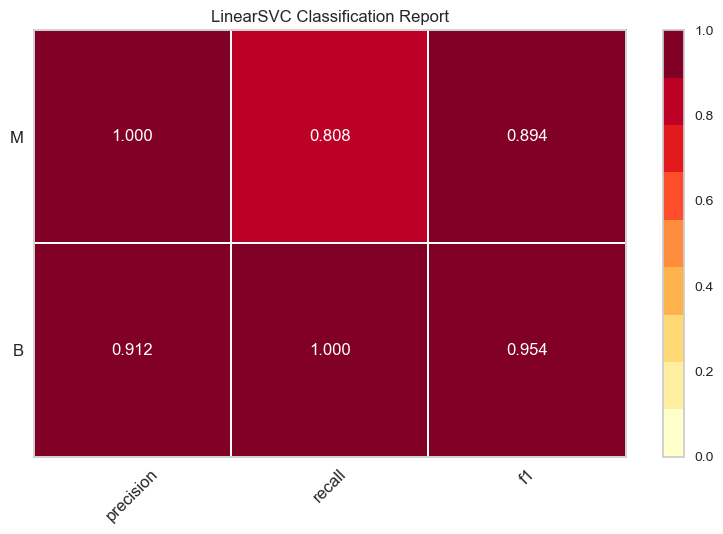

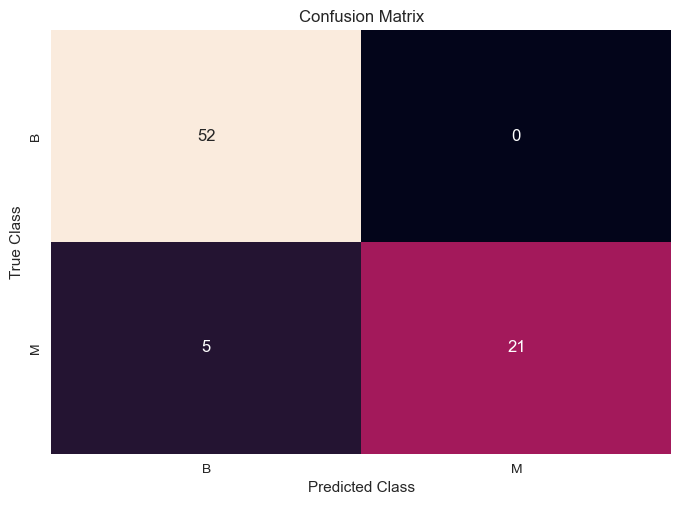

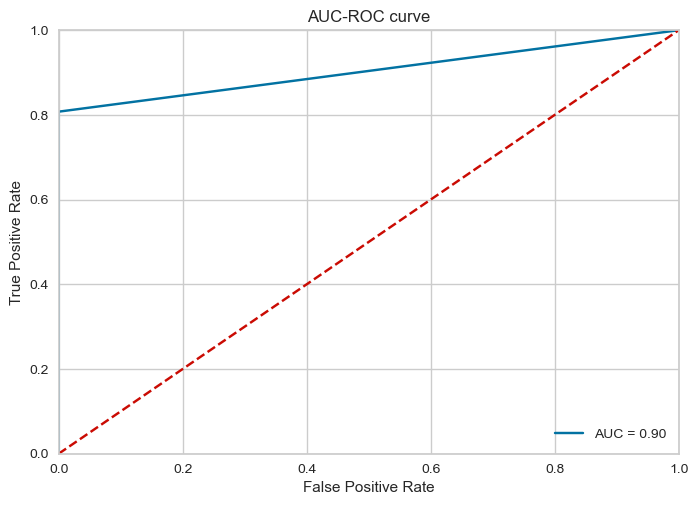

In [334]:
linear_svc_classifier = LinearSVC_train_and_test(x_train_scaled, y_train, x_test_scaled, y_test)

LinearSVC accuracy :  0.972972972972973


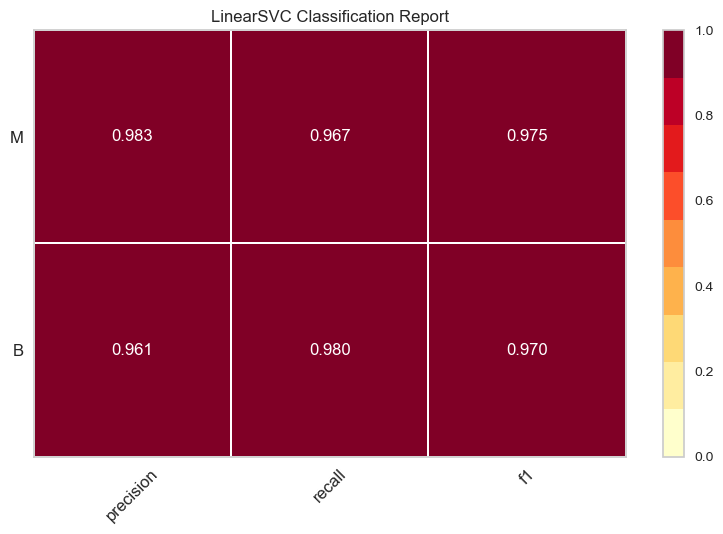

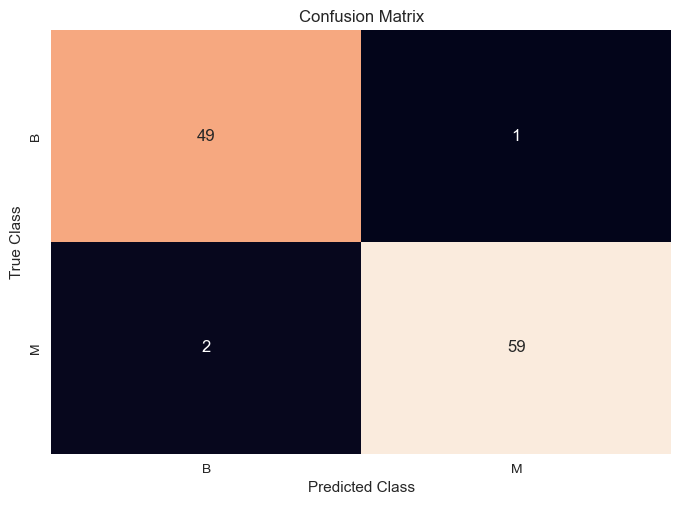

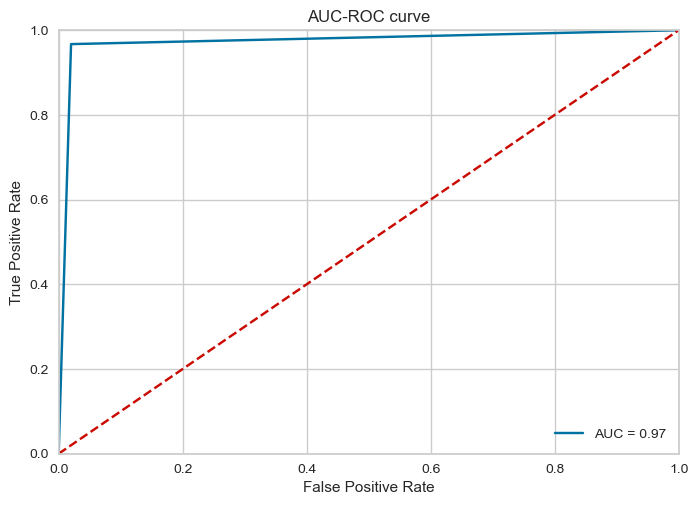

LinearSVC(dual=False, random_state=42)

In [359]:
LinearSVC_train_and_test(x_train_scaled_up, y_train_up, x_test_scaled_up, y_test_up)

LinearSVC accuracy :  0.8913043478260869


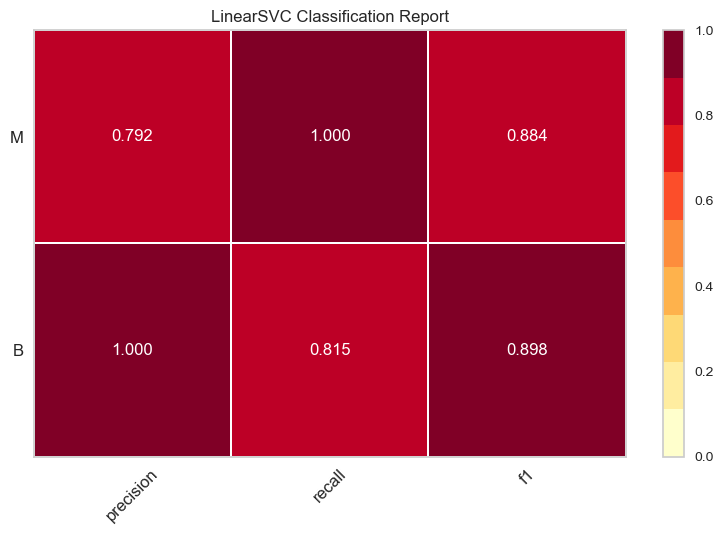

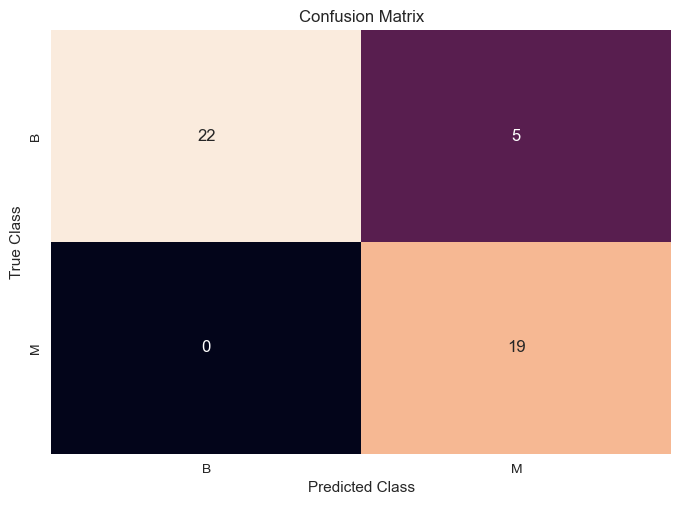

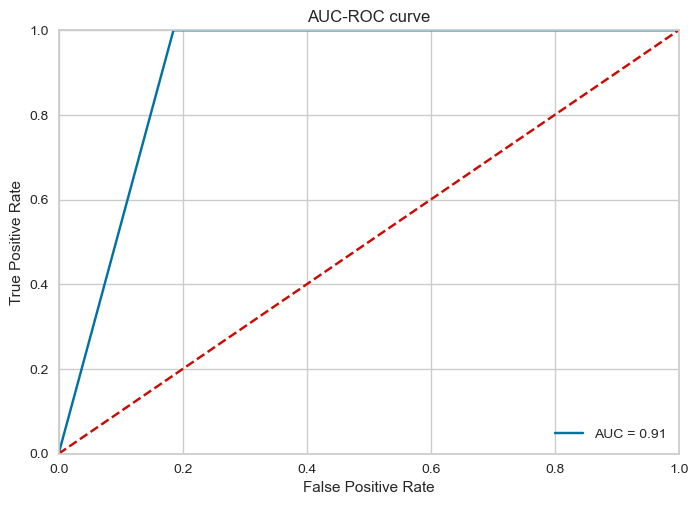

LinearSVC(dual=False, random_state=42)

In [387]:
LinearSVC_train_and_test(x_train_scaled_under, y_train_under, x_test_scaled_under, y_test_under)

# KNN


In [312]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def KNN_train_and_prediction(x_train, y_train, x_test, y_test) : 
    #create object of the lassifier
    knn = KNeighborsClassifier(n_neighbors=5)
    #Train the algorithm
    knn.fit(x_train, y_train)
    # predict the response
    pred = knn.predict(x_test)
    # evaluate accuracy
    print ("KNN accuracy score : ",accuracy_score(y_test, pred))

    visualize_results(knn, x_train, y_train, x_test, y_test)

    # Create confusion matrix
    matrix = confusion_matrix(y_test, pred)
    matrix_confusion(matrix)

    auc_roc_plot(y_test, pred)

    return knn


KNN accuracy score :  0.9230769230769231


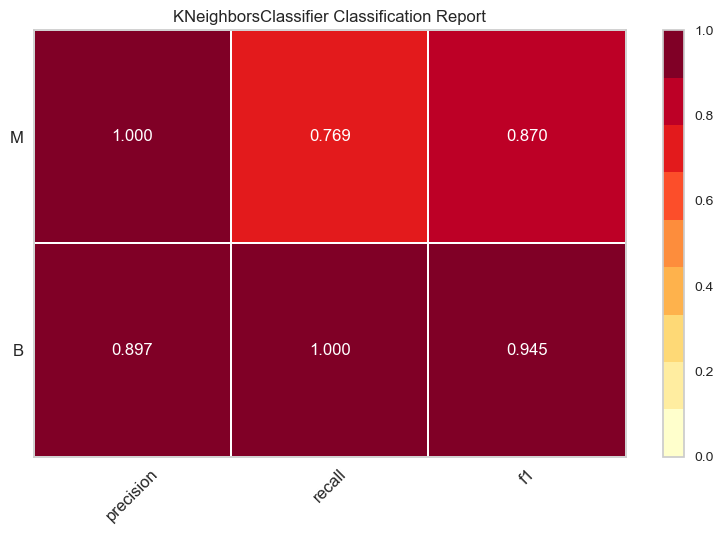

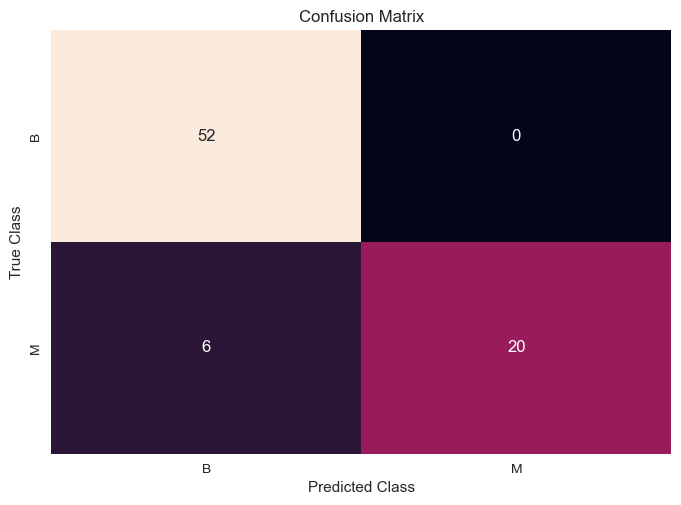

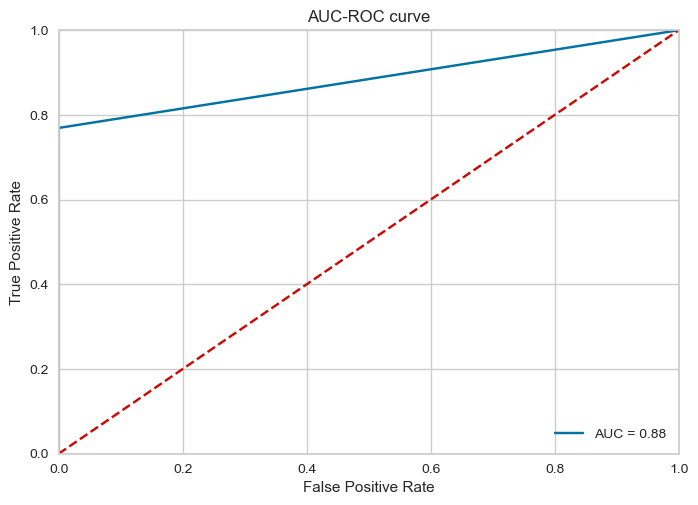

In [320]:
knn_classifier = KNN_train_and_prediction(x_train_scaled, y_train, x_test_scaled, y_test)

KNN accuracy score :  0.8918918918918919


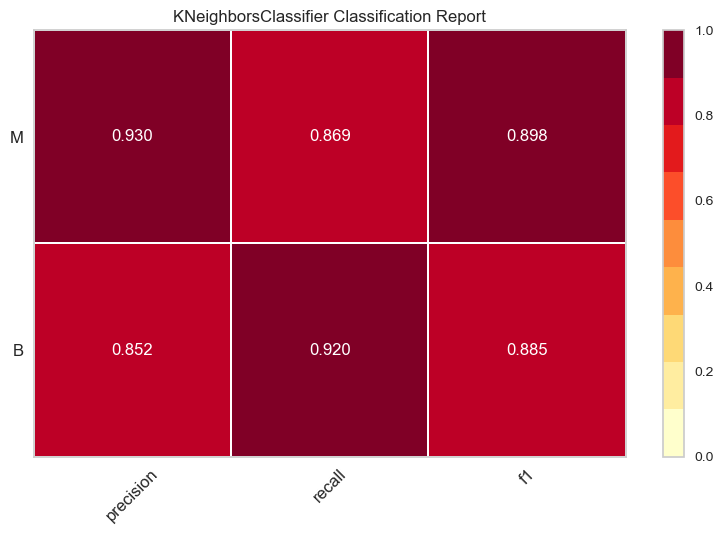

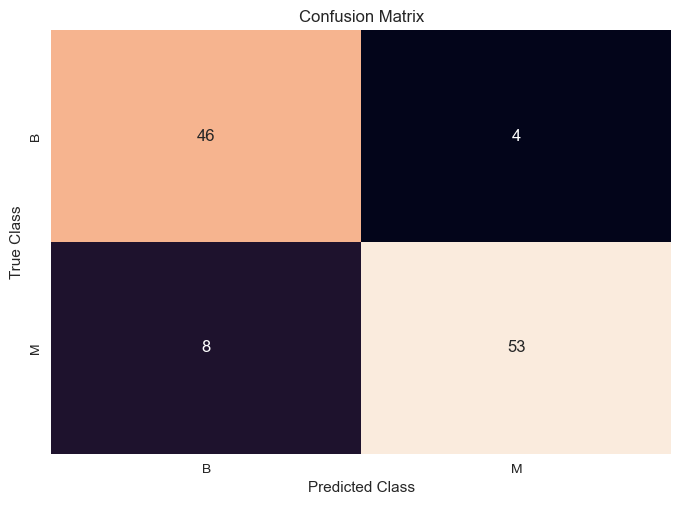

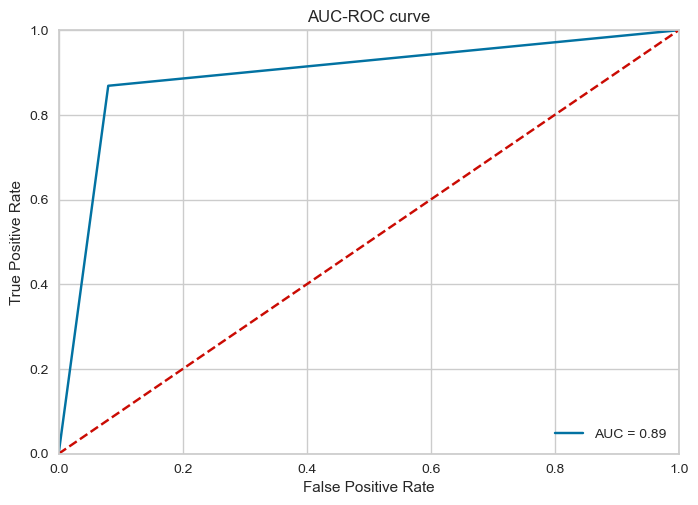

In [360]:
KNN_train_and_prediction(x_train_scaled_up, y_train_up, x_test_scaled_up, y_test_up)

KNN accuracy score :  0.8695652173913043


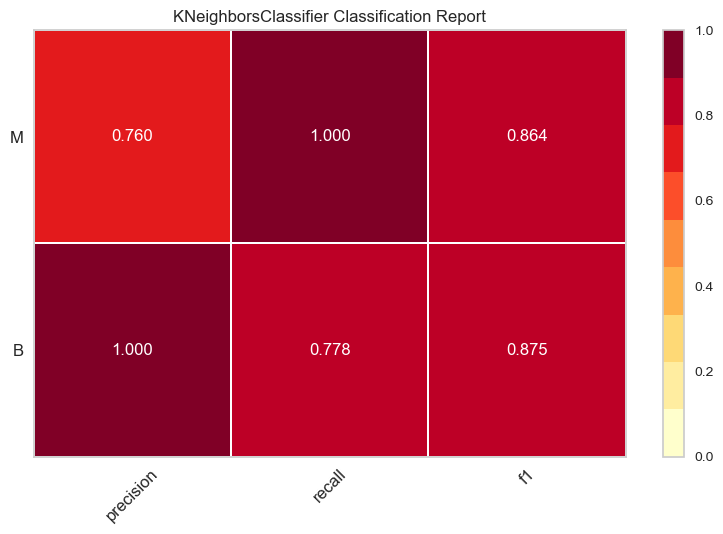

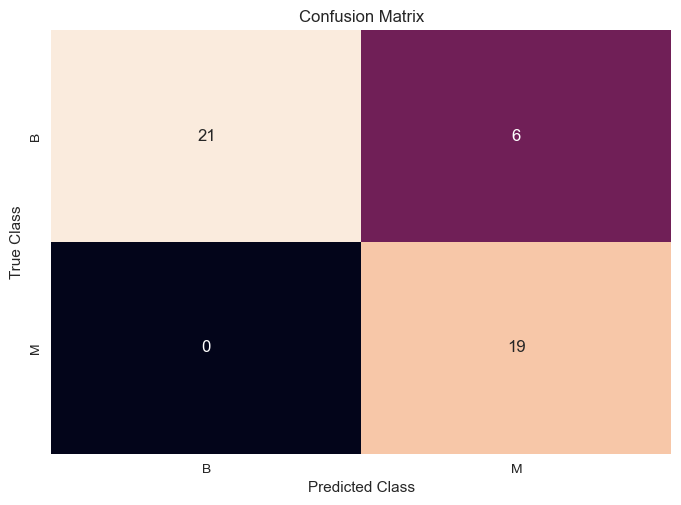

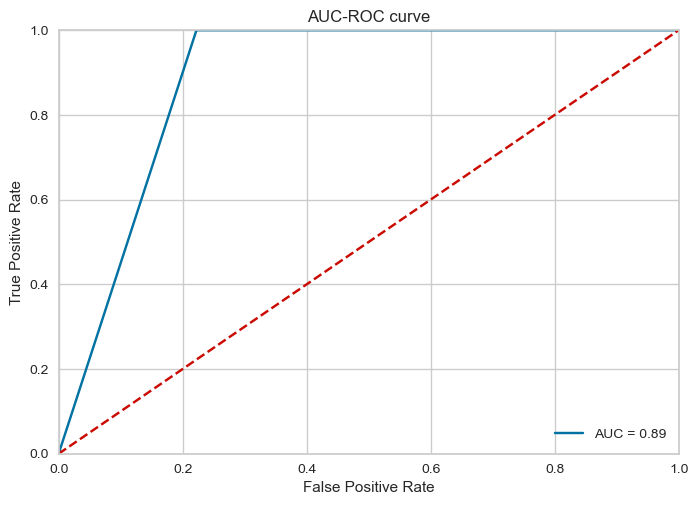

In [388]:
KNN_train_and_prediction(x_train_scaled_under, y_train_under, x_test_scaled_under, y_test_under)

# Random forest

In [324]:
def Random_Forest_train_and_predict(x_train, y_train, x_test, y_test) :
    random_forest = RandomForestClassifier(200)
    pred = random_forest.fit(x_train, y_train).predict(x_test)
    print("Random forest accuracy : ",accuracy_score(y_test, pred, normalize = True))

    visualize_results(random_forest, x_train, y_train, x_test, y_test)

    # Create confusion matrix
    matrix = confusion_matrix(y_test, pred)
    matrix_confusion(matrix)

    auc_roc_plot(y_test, pred)

    return random_forest

Random forest accuracy :  0.9102564102564102


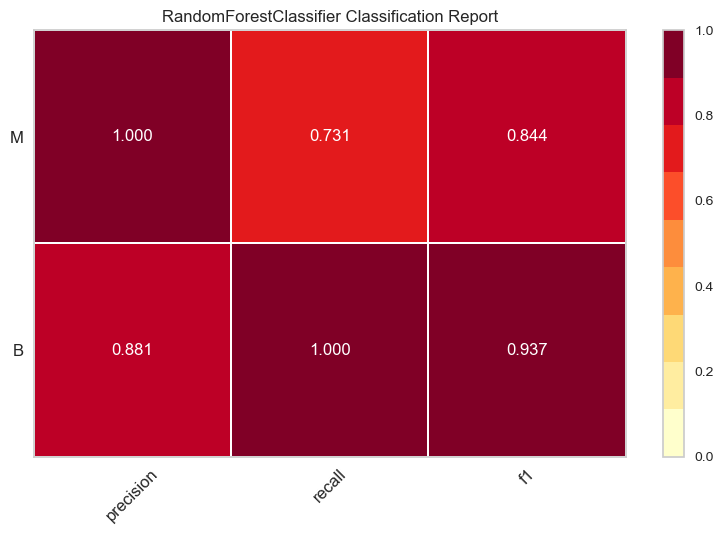

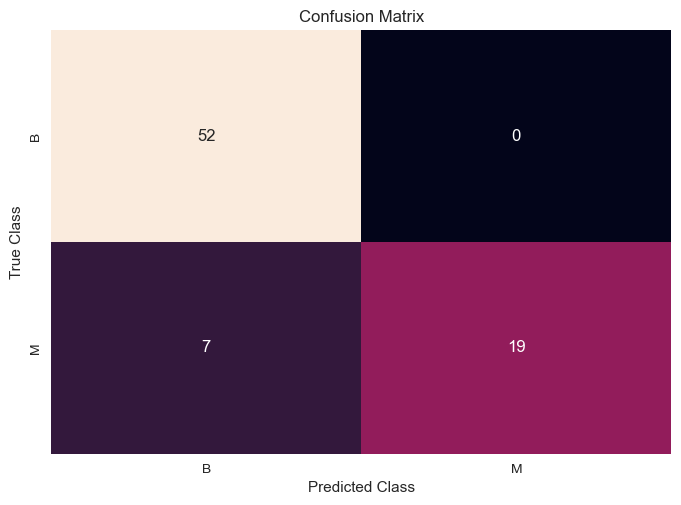

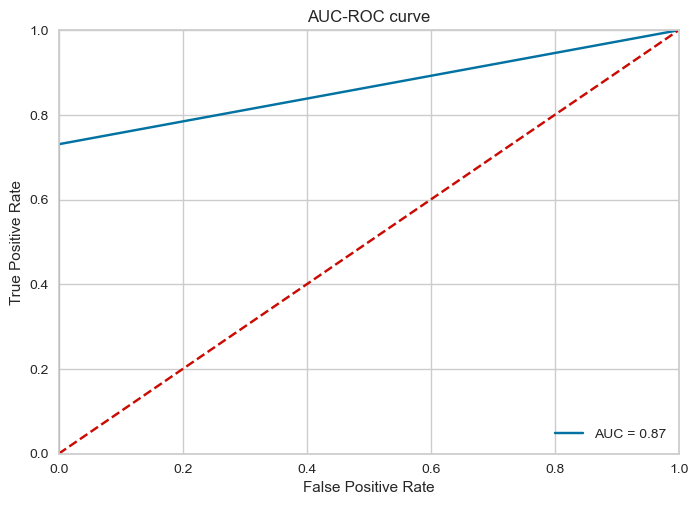

In [325]:
random_forest_classifier = Random_Forest_train_and_predict(x_train_scaled, y_train, x_test_scaled, y_test)

Random forest accuracy :  0.9279279279279279


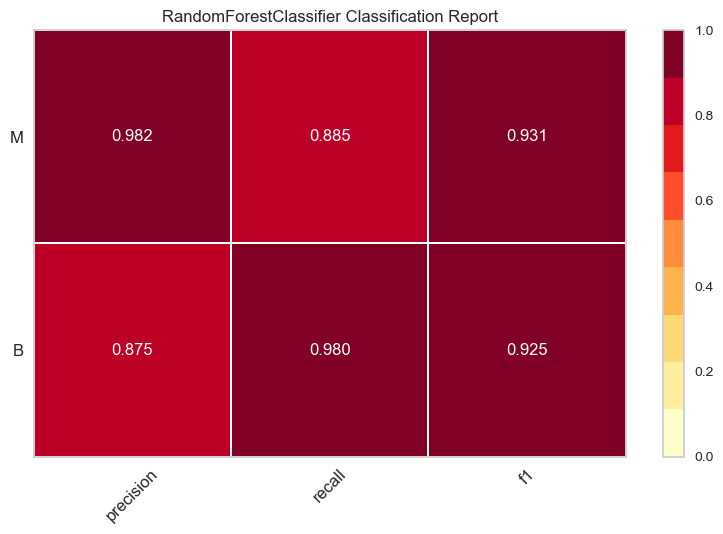

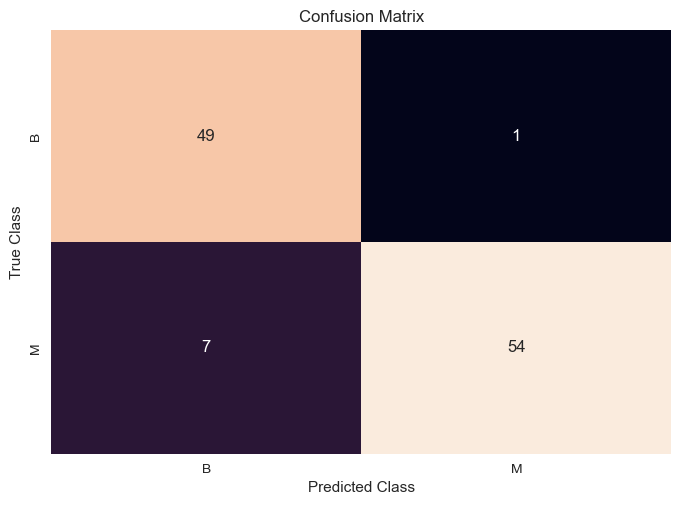

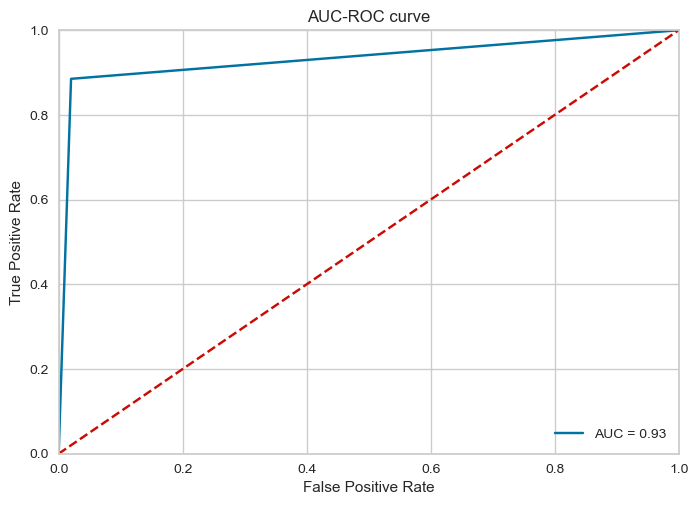

RandomForestClassifier(n_estimators=200)

In [361]:
Random_Forest_train_and_predict(x_train_scaled_up, y_train_up, x_test_scaled_up, y_test_up)

Random forest accuracy :  0.8695652173913043


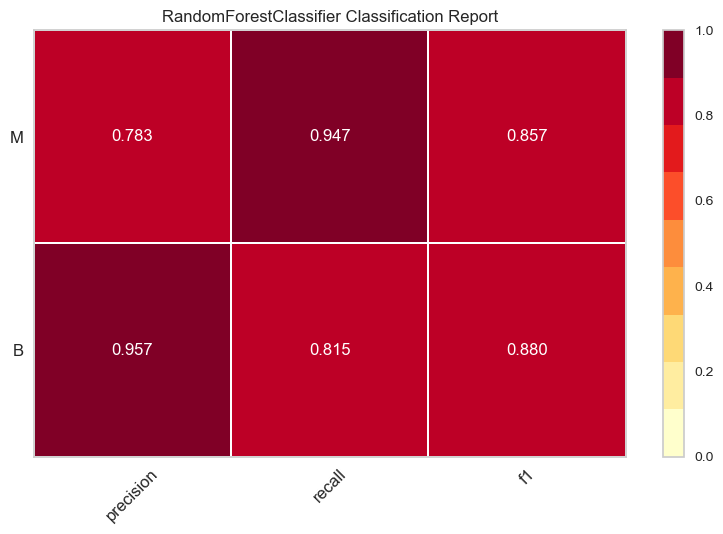

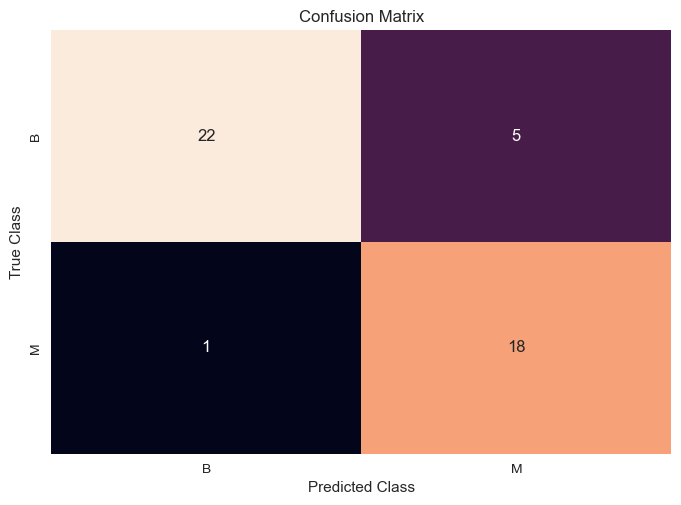

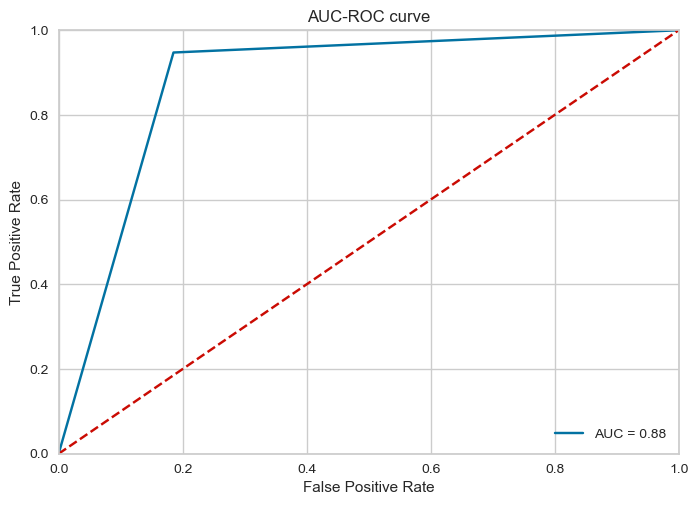

RandomForestClassifier(n_estimators=200)

In [389]:
Random_Forest_train_and_predict(x_train_scaled_under, y_train_under, x_test_scaled_under, y_test_under)

In [321]:
def Decision_Tree_train_and_predict(x_train, y_train, x_test, y_test) :
    dec_tree = DecisionTreeClassifier(random_state=42)    
    pred = dec_tree.fit(x_train, y_train).predict(x_test)
    print("Decision Tree accuracy : ",accuracy_score(y_test, pred, normalize = True))

    visualize_results(dec_tree, x_train, y_train, x_test, y_test)

    # Create confusion matrix
    matrix = confusion_matrix(y_test, pred)
    matrix_confusion(matrix)

    auc_roc_plot(y_test, pred)

    return dec_tree

Decision Tree accuracy :  0.9102564102564102


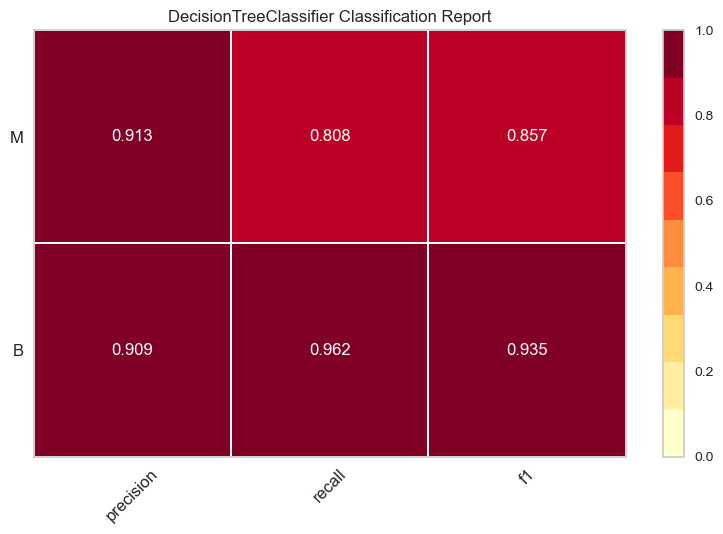

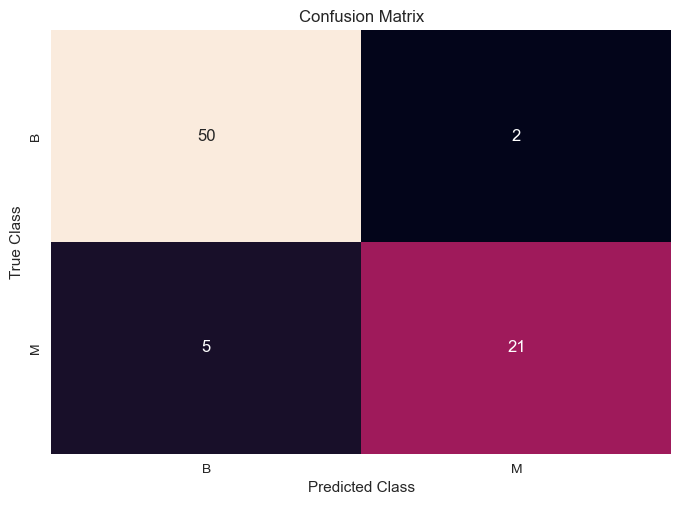

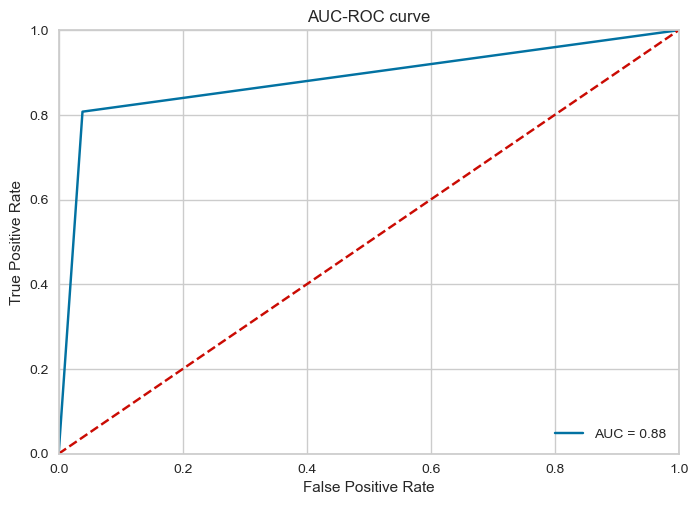

In [322]:
decisionTreeClassifier = Decision_Tree_train_and_predict(x_train_scaled, y_train, x_test_scaled, y_test)

Decision Tree accuracy :  0.8738738738738738


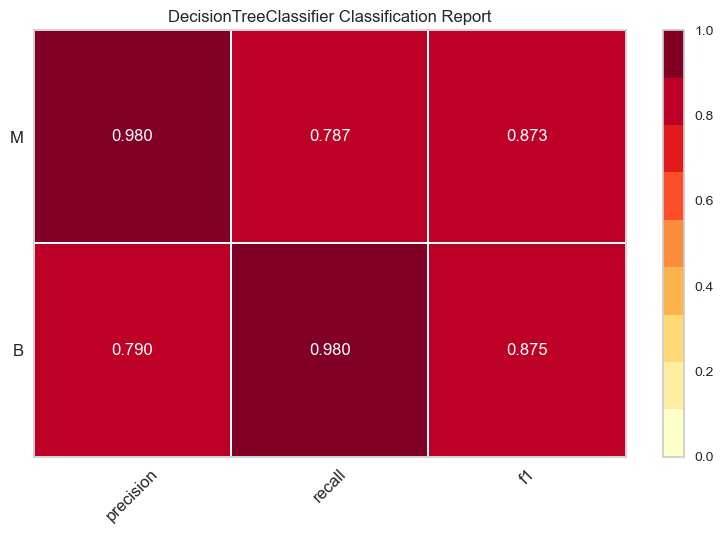

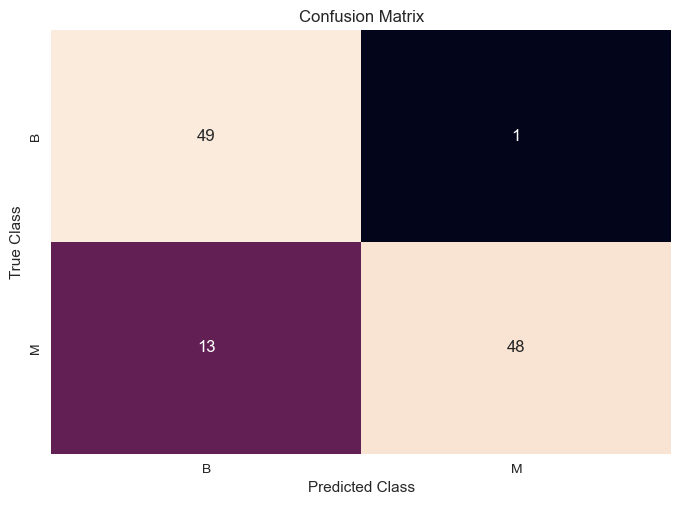

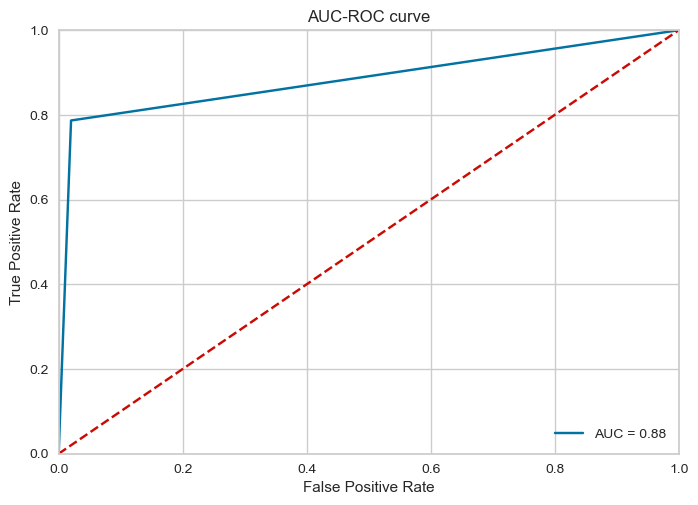

DecisionTreeClassifier(random_state=42)

In [362]:
Decision_Tree_train_and_predict(x_train_scaled_up, y_train_up, x_test_scaled_up, y_test_up)

Decision Tree accuracy :  0.7608695652173914


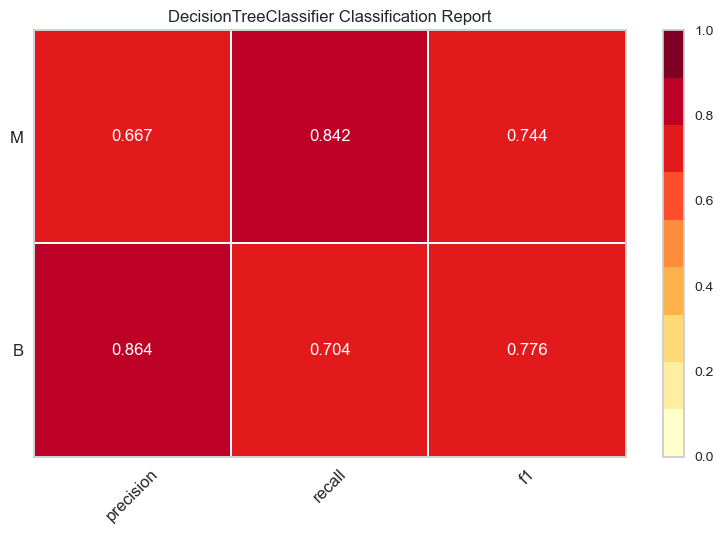

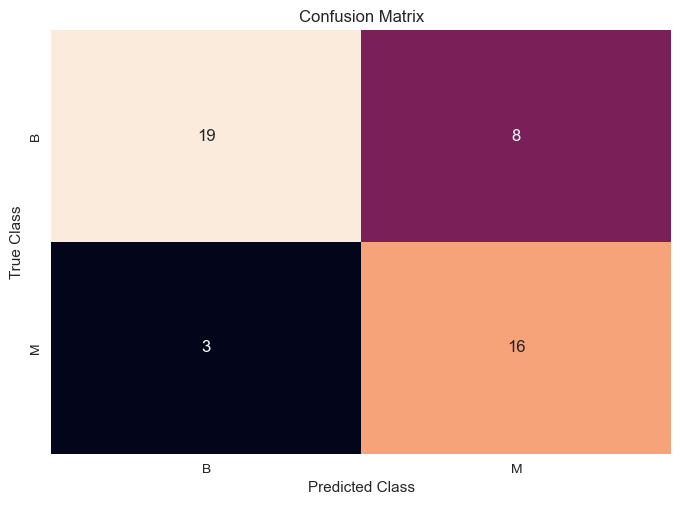

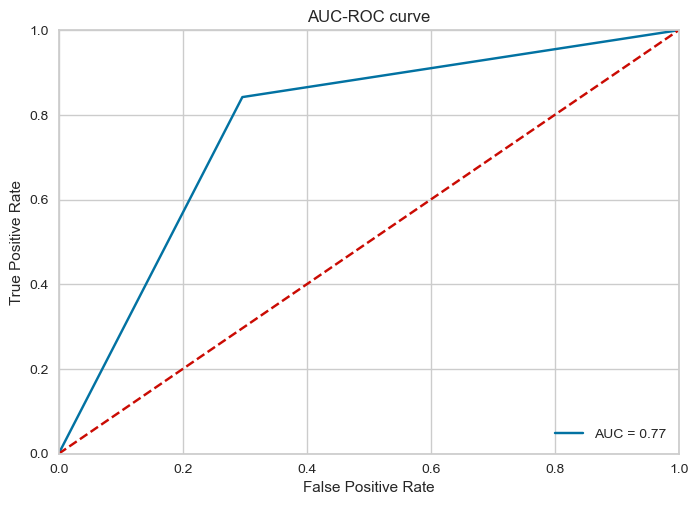

DecisionTreeClassifier(random_state=42)

In [384]:
Decision_Tree_train_and_predict(x_train_scaled_under, y_train_under, x_test_scaled_under, y_test_under)

In [338]:
gnb = GaussianNB()
linear = LinearSVC(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
random_forest = RandomForestClassifier(random_state=42)
decisionTree =  DecisionTreeClassifier(random_state=42)    

all_classifiers = [gnb, linear, knn, random_forest, decisionTree]

In [371]:
from tabulate import tabulate
pdtabulate = lambda df: tabulate(df, headers='keys', tablefmt='psql', showindex=False)

def cross_validate_by_sanja (title, x_train, y_train) :
    columns = ["Classifier", "accuracy", "precision", "recall", "f1", "roc-auc"]
    df = pd.DataFrame(columns=columns)
    print(title)

    for classifier in all_classifiers:
        scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']
        scores = cross_validate(classifier, x_train, y_train, scoring=scoring, cv=5)

        accuracy = scores['test_accuracy'].mean()
        precision = scores['test_precision_macro'].mean()
        recall = scores['test_recall_macro'].mean()
        f1 = scores['test_f1_macro'].mean()
        roc_auc = scores['test_roc_auc_ovr'].mean()

        df.loc[len(df.index)] = [classifier.__class__.__name__, accuracy, precision, recall, f1, roc_auc]

    
    print(pdtabulate(df.round(3))) 

In [372]:
cross_validate_by_sanja('Cross-validation on scaled dataset', x_train_scaled, y_train)

Cross-validation on scaled dataset
+------------------------+------------+-------------+----------+-------+-----------+
| Classifier             |   accuracy |   precision |   recall |    f1 |   roc-auc |
|------------------------+------------+-------------+----------+-------+-----------|
| GaussianNB             |      0.917 |       0.898 |    0.896 | 0.896 |     0.963 |
| LinearSVC              |      0.939 |       0.926 |    0.922 | 0.923 |   nan     |
| KNeighborsClassifier   |      0.933 |       0.933 |    0.897 | 0.912 |     0.957 |
| RandomForestClassifier |      0.923 |       0.914 |    0.893 | 0.9   |     0.974 |
| DecisionTreeClassifier |      0.897 |       0.879 |    0.868 | 0.87  |     0.868 |
+------------------------+------------+-------------+----------+-------+-----------+


In [373]:
cross_validate_by_sanja('Cross-validation on upsampled and scaled dataset', x_train_scaled_up, y_train_up)

Cross-validation on upsampled and scaled dataset
+------------------------+------------+-------------+----------+-------+-----------+
| Classifier             |   accuracy |   precision |   recall |    f1 |   roc-auc |
|------------------------+------------+-------------+----------+-------+-----------|
| GaussianNB             |      0.896 |       0.897 |    0.896 | 0.896 |     0.967 |
| LinearSVC              |      0.95  |       0.951 |    0.95  | 0.95  |   nan     |
| KNeighborsClassifier   |      0.921 |       0.922 |    0.921 | 0.921 |     0.977 |
| RandomForestClassifier |      0.973 |       0.973 |    0.973 | 0.973 |     0.997 |
| DecisionTreeClassifier |      0.959 |       0.961 |    0.96  | 0.959 |     0.96  |
+------------------------+------------+-------------+----------+-------+-----------+


In [390]:
cross_validate_by_sanja('Cross-validation on undersampled and scaled dataset', x_train_scaled_under, y_train_under)

Cross-validation on undersampled and scaled dataset
+------------------------+------------+-------------+----------+-------+-----------+
| Classifier             |   accuracy |   precision |   recall |    f1 |   roc-auc |
|------------------------+------------+-------------+----------+-------+-----------|
| GaussianNB             |      0.9   |       0.905 |    0.9   | 0.899 |     0.966 |
| LinearSVC              |      0.922 |       0.927 |    0.923 | 0.922 |   nan     |
| KNeighborsClassifier   |      0.9   |       0.904 |    0.899 | 0.899 |     0.975 |
| RandomForestClassifier |      0.9   |       0.904 |    0.899 | 0.899 |     0.978 |
| DecisionTreeClassifier |      0.878 |       0.88  |    0.877 | 0.877 |     0.877 |
+------------------------+------------+-------------+----------+-------+-----------+


# Feature selection

In [391]:
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

def select_k_best(X_train, y_train, X_test):
    k_best = SelectKBest(score_func=f_classif, k=10)
    fit = k_best.fit(X_train, y_train)
    X_train_new = k_best.transform(X_train)
    X_test_new = k_best.transform(X_test)

    return X_train_new, X_test_new, fit.scores_

def visualize_univariate_scores(cols, scores):
    df_scores = pd.DataFrame(scores)
    df_columns = pd.DataFrame(cols)
    featureScores = pd.concat([df_columns, df_scores], axis=1)
    featureScores.columns = ['Feature','Score'] 

    featureScores.sort_values(by='Score').plot(kind='barh', x='Feature',  y='Score')
    plt.show()

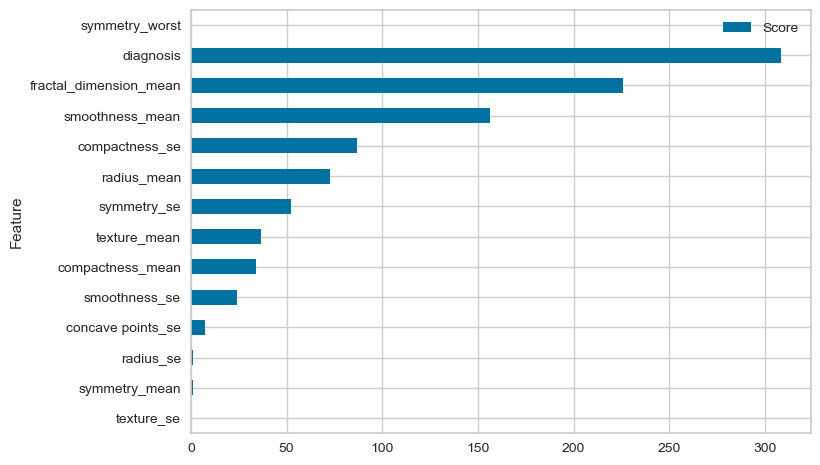

In [394]:
x_train_scaled_fi, y_train_scaled_fi, fi_scores = select_k_best(x_train_scaled, y_train, x_test_scaled)
visualize_univariate_scores(dataset_without_outliers.columns, fi_scores)

In [397]:
cross_validate_by_sanja('Cross-validation after feature importance', x_train_scaled_fi, y_train)

Cross-validation after feature importance
+------------------------+------------+-------------+----------+-------+-----------+
| Classifier             |   accuracy |   precision |   recall |    f1 |   roc-auc |
|------------------------+------------+-------------+----------+-------+-----------|
| GaussianNB             |      0.917 |       0.899 |    0.892 | 0.895 |     0.966 |
| LinearSVC              |      0.945 |       0.945 |    0.919 | 0.929 |   nan     |
| KNeighborsClassifier   |      0.945 |       0.95  |    0.912 | 0.928 |     0.978 |
| RandomForestClassifier |      0.923 |       0.91  |    0.896 | 0.902 |     0.976 |
| DecisionTreeClassifier |      0.884 |       0.859 |    0.856 | 0.855 |     0.856 |
+------------------------+------------+-------------+----------+-------+-----------+
